### Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

##### Approved: The Company has approved loan Application

##### Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

##### Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

##### Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 


### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


### 2. Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1 Supress warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Adjust Dataframes to display more data.

In [3]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

### 3. Importing Input Data

###### An assumption is made here that the files are stored in the same location as this notebook and hence is only referenced using a relative path. 

In [4]:
application_data = pd.read_csv("application_data.csv")
prev_application_data = pd.read_csv("previous_application.csv")

#### 3.1 Examining the DataFrames

In [5]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_data.shape

(307511, 122)

In [7]:
prev_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
prev_application_data.shape

(1670214, 37)

In [9]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [10]:
prev_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
prev_application_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 4. Data Cleaning, Outlier Handling and Data Augmentation

#### 4.1 Null Value Examination

#### 4.1.1 Null value examination on Application_data DataFrame

In [13]:
(application_data.isna().sum()/application_data.shape[0]*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

##### Comments :
We can see that this dataframe has numerous null value columns. Let's take 50 percent as an arbitary cut-off and only work with columns with less than 50% of null values. 

In [14]:
null_cols_percentage = (application_data.isna().sum()/application_data.shape[0]*100).sort_values(ascending=False)

application_data = application_data[null_cols_percentage[null_cols_percentage < 50].index]


In [15]:
application_data.shape

(307511, 81)

##### Comments:
We have no removed columns with null values more than 50percent and we are left with 81 columns.

In [16]:
(application_data.isna().sum()/application_data.shape[0]*100).sort_values(ascending=False)

FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
NAME_TYPE_SUITE                  0.420148
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

#### 4.1.2 Null value examination on the Previous_Application DataFrame

In [17]:
(prev_application_data.isna().sum()/prev_application_data.shape[0]*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

##### Comments :
We can see that this dataframe has numerous null value columns. Let's take 50 percent as an arbitary cut-off and only work with columns with less than 50% of null values.

In [18]:
null_cols_precent = (prev_application_data.isna().sum()/prev_application_data.shape[0]*100).sort_values(ascending=False)

prev_application_data = prev_application_data[null_cols_precent[null_cols_precent < 50].index]

In [19]:
prev_application_data.shape

(1670214, 33)

##### Comments:
We have no removed columns with null values more than 50percent and we are left with 33 columns.

In [20]:
(prev_application_data.isna().sum()/prev_application_data.shape[0]*100).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
HOUR_APPR_PROCESS_START         0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
CODE_REJECT_REAS

#### 4.2 Fixing Columns and Data Types

#### 4.2.1 Fixing Application_Data DataFrame

In [21]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   FLOORSMAX_MODE                154491 non-null  float64
 1   FLOORSMAX_MEDI                154491 non-null  float64
 2   FLOORSMAX_AVG                 154491 non-null  float64
 3   YEARS_BEGINEXPLUATATION_MEDI  157504 non-null  float64
 4   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 5   YEARS_BEGINEXPLUATATION_MODE  157504 non-null  float64
 6   TOTALAREA_MODE                159080 non-null  float64
 7   EMERGENCYSTATE_MODE           161756 non-null  object 
 8   OCCUPATION_TYPE               211120 non-null  object 
 9   EXT_SOURCE_3                  246546 non-null  float64
 10  AMT_REQ_CREDIT_BUREAU_QRT     265992 non-null  float64
 11  AMT_REQ_CREDIT_BUREAU_YEAR    265992 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_WEEK    265992 non-nul

##### Comments : 
We can see that there isn't any major type cast errors, but we can see that there are a few columns that indicate a flag value being cast as type - int. This can be changed to a categorical type. 


#### 4.2.2 Indentifying Flags and other columns with only 2 values on the Application_Data DataFrame. 

In [22]:
application_data.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY               2
FLAG_DOCUMENT_9                      2
FLAG_OWN_CAR                         2
FLAG_DOCUMENT_4                      2
TARGET                               2
FLAG_PHONE                           2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMP_PHONE                       2
FLAG_MOBIL                           2
NAME_CONTRACT_TYPE                   2
FLAG_OWN_REALTY                      2
REG_CITY_NOT_WORK_CITY               2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
LIVE_REGION_NOT_WORK_REGION          2
FLAG_DOCUMENT_6                      2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_2                      2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_11                     2
FLAG_EMAIL                           2
REG_REGION_NOT_WORK_REGION           2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_21         

##### Comments:
We see numerous columns that only have two values, we can convert  this to either boolean or categorical type. We could leave these as it is for now.

#### 4.2.3 Fixing Prev_Application_Data DataFrame

In [23]:
prev_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_TYPE_SUITE              849809 non-null   object 
 1   DAYS_TERMINATION             997149 non-null   float64
 2   NFLAG_INSURED_ON_APPROVAL    997149 non-null   float64
 3   DAYS_FIRST_DRAWING           997149 non-null   float64
 4   DAYS_FIRST_DUE               997149 non-null   float64
 5   DAYS_LAST_DUE_1ST_VERSION    997149 non-null   float64
 6   DAYS_LAST_DUE                997149 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   AMT_ANNUITY                  1297979 non-null  float64
 9   CNT_PAYMENT                  1297984 non-null  float64
 10  PRODUCT_COMBINATION          1669868 non-null  object 
 11  AMT_CREDIT                   1670213 non-null  float64
 12  SK_ID_CURR                   1670214 non-n

##### Comments : 
We can see that there isn't any major type cast errors, but we can see that there are a few columns that indicate a flag value being cast as type - int. 
We leave this as it is for now. 

#### 4.2.4 Indentifying Flags and other columns with only 2 values on the Prev_Application_Data DataFrame. 

In [24]:
prev_application_data.nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE                     2873
DAYS_FIRST_DUE                    2892
DAYS_DECISION            

##### Comments:
We see numerous columns that only have two values, we can convert  this to either boolean or categorical type. Let's convert this to a categorical Type. Which we can leave as it is.

#### 4.3 Null-Value Handling

#### 4.3.1 Null-Value Handling on Application_Data DataFrame.

###### Comments : 
This section defines strategies for handling the null-values. But does not implement the same on all columns with null-values. 

Identifying Columns for null value handling. 

In [25]:
(application_data.isna().sum()/application_data.shape[0]*100).sort_values(ascending=False)

FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
NAME_TYPE_SUITE                  0.420148
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

##### Comments:
The Columns with missing values are noted down below. These contains both continuous and categorical values and hence would need to be handled uniquely the strageies are dicussed further down in the next sections. 

| Column Name | Null-Value Percentage |
| --: | -: |
| FLOORSMAX_MODE               |    49.760822 |
| FLOORSMAX_MEDI               |    49.760822 |
| FLOORSMAX_AVG                |    49.760822 |
| YEARS_BEGINEXPLUATATION_MEDI |    48.781019 |
| YEARS_BEGINEXPLUATATION_AVG  |    48.781019 |
| YEARS_BEGINEXPLUATATION_MODE |    48.781019 |
| TOTALAREA_MODE               |    48.268517 |
| EMERGENCYSTATE_MODE          |    47.398304 |
| OCCUPATION_TYPE              |    31.345545 |
| EXT_SOURCE_3                 |    19.825307 |
| AMT_REQ_CREDIT_BUREAU_QRT    |    13.501631 |
| AMT_REQ_CREDIT_BUREAU_YEAR   |    13.501631 |
| AMT_REQ_CREDIT_BUREAU_WEEK   |    13.501631 |
| AMT_REQ_CREDIT_BUREAU_MON    |    13.501631 |
| AMT_REQ_CREDIT_BUREAU_DAY    |    13.501631 |
| AMT_REQ_CREDIT_BUREAU_HOUR   |    13.501631 |
| NAME_TYPE_SUITE              |     0.420148 |
| OBS_60_CNT_SOCIAL_CIRCLE     |     0.332021 |
| DEF_30_CNT_SOCIAL_CIRCLE     |     0.332021 |
| DEF_60_CNT_SOCIAL_CIRCLE     |     0.332021 |
| OBS_30_CNT_SOCIAL_CIRCLE     |     0.332021 |
| EXT_SOURCE_2                 |     0.214626 |
| AMT_GOODS_PRICE              |     0.090403 |
| AMT_ANNUITY                  |     0.003902 |
| CNT_FAM_MEMBERS              |     0.000650 |
| DAYS_LAST_PHONE_CHANGE       |     0.000325 |


However we would still need to examine other columns in which the null values are not np.nan but something else eg: XNA in the CODE_GENDER column.

#### 4.3.1.1 Null-Value Handling on a Categorical Variable - OCCUPATION_TYPE.

Let's look at the column first.

In [26]:
application_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

##### Comments: 
We see that there is not much difference between Laborores and Sales Staff.

##### Strategy : 
In such a case where we can not be decisive, for a categorical variable we can create a new value such as 'Others' and impute the missing values with this new value. 

In [27]:
application_data.OCCUPATION_TYPE.fillna('Others',inplace=True)
application_data.OCCUPATION_TYPE.isna().sum()

0

#### 4.3.1.2 Null-Value Handling on a Categorical Variable - CODE_GENDER.

In [28]:
application_data.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

##### Comments : 
We see that there are 3 distinct values for CODE_GENDER: 'M', 'F' and 'XNA'
This could be due to gender of the person not being disclosed by the client themselves. 

##### Strategy : 
We could impute this column with the mode. As there is not much similarity with the frequencies of each value.

In [29]:
application_data.CODE_GENDER.mode()

0    F
dtype: object

In [30]:
application_data.CODE_GENDER.replace('XNA',application_data.CODE_GENDER.mode()[0], inplace=True)
application_data.CODE_GENDER.value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

##### Comments:
Now that we have seen two strategies for handling categorical variables, we will move on Numerical continuous variables next.


#### 4.3.1.3 Null-Value Handling on a Countinuous Variable - AMT_GOODS_PRICE.

Let's take a look at how the variable is distributed.

In [31]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

##### Comments:
We can see that this variable has some issues with outliers as the max value is much higher than the 75th percentile of this column. 

##### Strategy : 
We have two options 
1) Impute the missing values with a median value. 

2) Impute the missing values with a mean value if there are no outlier influence or if the imputation does not skew the data.  

In this case we describe the first option. But first lets reconfirm the assumption of outlier influence.

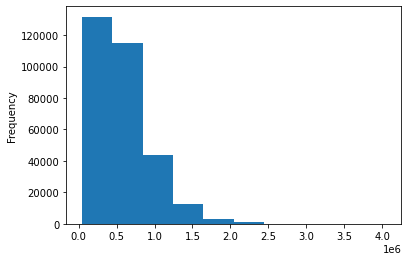

In [32]:
application_data.AMT_GOODS_PRICE.plot.hist()
plt.show()

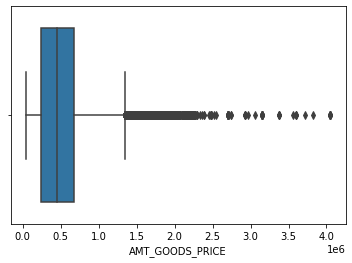

In [33]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

We can clearly see there are outliers influencing this variable. Let's check the mean values and compare it to the median

In [34]:
print("Mean : %F"  %application_data.AMT_GOODS_PRICE.mean() )
print("Median : %F"  %application_data.AMT_GOODS_PRICE.median() )

Mean : 538396.207429
Median : 450000.000000


##### Comment:
Let's impute the missing values with the Median value. 

In [35]:
application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median(),inplace=True)
application_data.AMT_GOODS_PRICE.isna().sum()

0

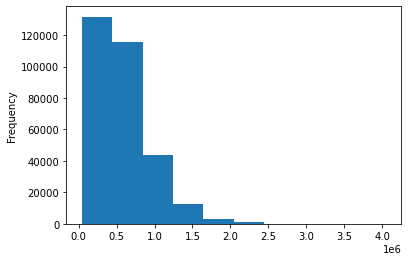

In [36]:
application_data.AMT_GOODS_PRICE.plot.hist()
plt.show()

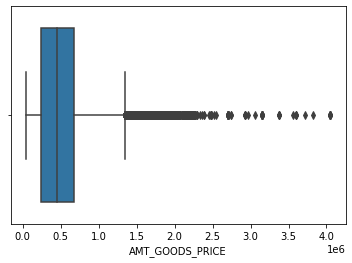

In [37]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

#### 4.3.2 Null-Value Handling for Prev_Application_data DataFrame

In [38]:
(prev_application_data.isna().sum()/prev_application_data.shape[0]*100).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
HOUR_APPR_PROCESS_START         0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
CODE_REJECT_REAS

The Columns with missing values are noted down below. These contains both continuous and categorical values. We will use the same strategies described above.

| Column Name | Null-Value Percentage |
| --: | -: |
| NAME_TYPE_SUITE           |      49.119754 |
| DAYS_TERMINATION          |      40.298129 |
| NFLAG_INSURED_ON_APPROVAL |      40.298129 |
| DAYS_FIRST_DRAWING        |      40.298129 |
| DAYS_FIRST_DUE            |      40.298129 |
| DAYS_LAST_DUE_1ST_VERSION |      40.298129 |
| DAYS_LAST_DUE             |      40.298129 |
| AMT_GOODS_PRICE           |      23.081773 |
| AMT_ANNUITY               |      22.286665 |
| CNT_PAYMENT               |      22.286366 |
| PRODUCT_COMBINATION       |       0.020716 |
| AMT_CREDIT                |       0.000060 |

#### 4.3.2.1 Null-Value Handling on a Countinuous Variable - AMT_ANNUITY.

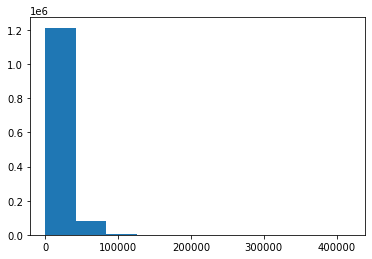

In [39]:
plt.hist(prev_application_data.AMT_ANNUITY)
plt.show()

In [40]:
prev_application_data.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

##### Comment: 
We see that there are outlier influences here as well. We can use the median in this case. 

In [41]:
prev_application_data.AMT_ANNUITY.fillna(prev_application_data.AMT_ANNUITY.median(),inplace=True)
prev_application_data.AMT_ANNUITY.isna().sum()


0

#### 4.3.2.2 Null-Value Handling on a Categorical Variable - NAME_TYPE_SUITE.

In [42]:
prev_application_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.598923
Family             0.250954
Spouse, partner    0.078922
Children           0.037145
Other_B            0.020739
Other_A            0.010681
Group of people    0.002636
Name: NAME_TYPE_SUITE, dtype: float64

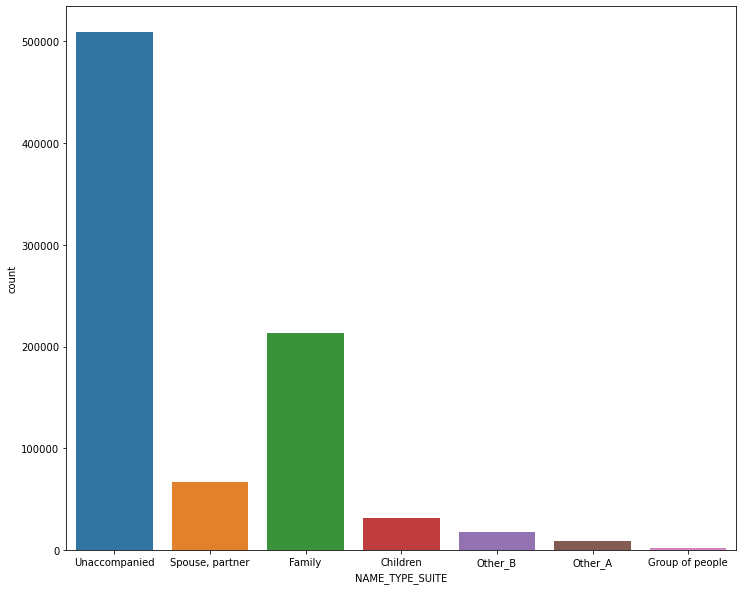

In [43]:
plt.figure(figsize=(12,10))
sns.countplot(prev_application_data.NAME_TYPE_SUITE)
plt.show()

##### Comment : 
Since we can't make a clear distinction, we can create a new category called 'Unknown' and impute the missing values.

In [44]:
prev_application_data.NAME_TYPE_SUITE.fillna('Unknown',inplace=True)
prev_application_data.NAME_TYPE_SUITE.isna().sum()

0

#### 4.4. Outlier Handling

#### 4.4.1 Outlier Handling on Application_Data DataFrame

##### Strategy : 
1) We can use data until a cut-off of the percentile on numerical variables

2) We can create new categorical varaibles dervied from numerical variable to limit the scope of the outlier influence.  

#### 4.4.1.1 Outlier Analysis  on Application_Data DataFrame

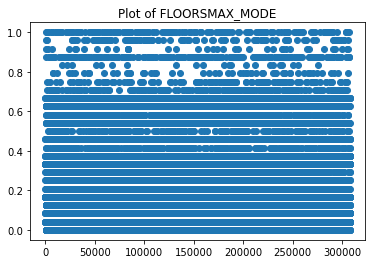

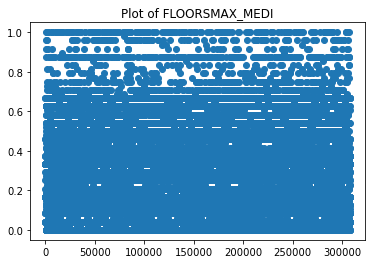

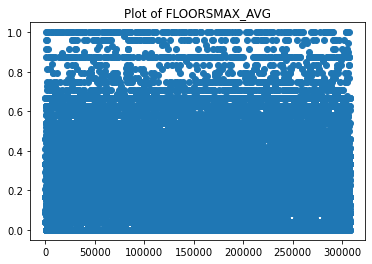

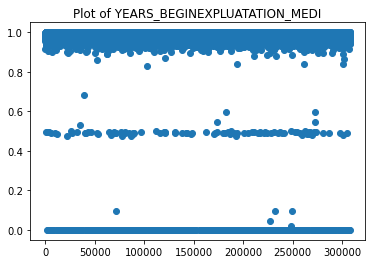

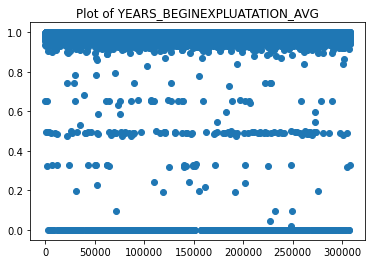

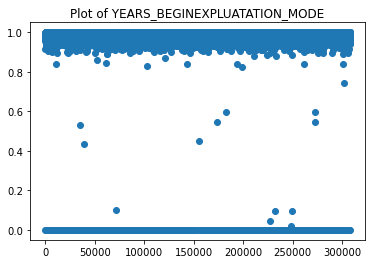

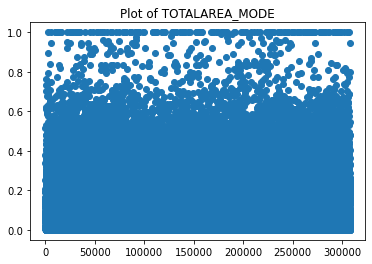

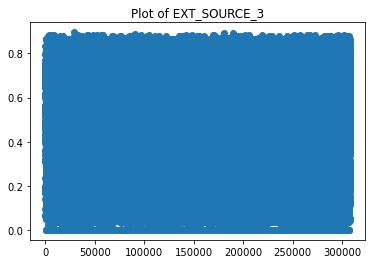

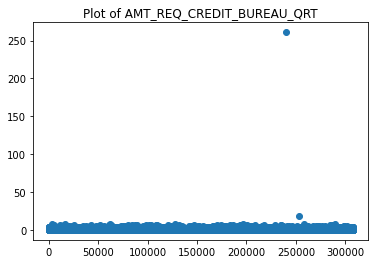

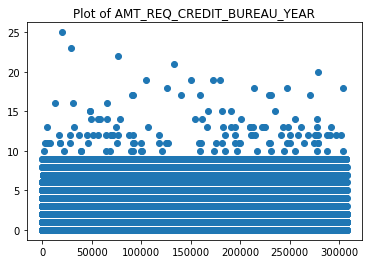

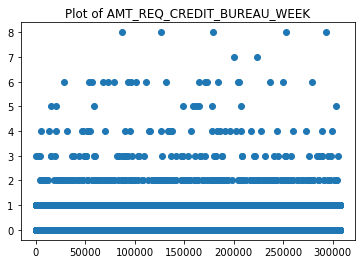

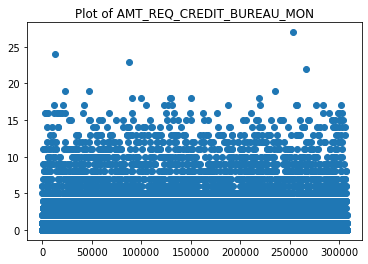

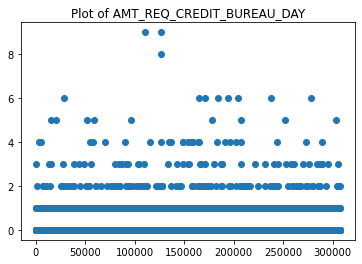

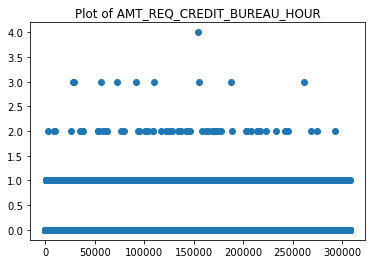

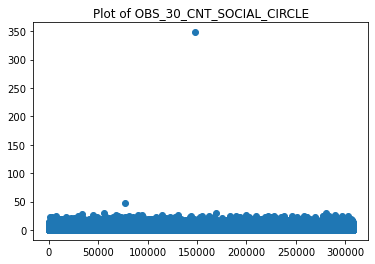

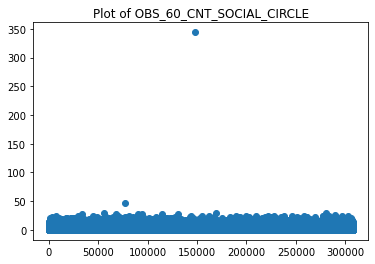

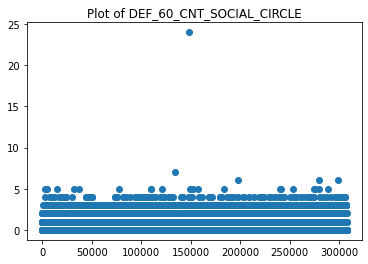

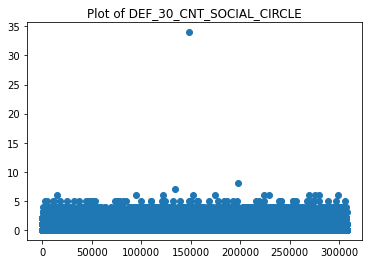

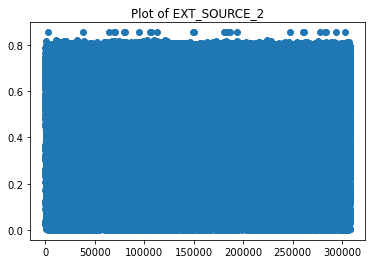

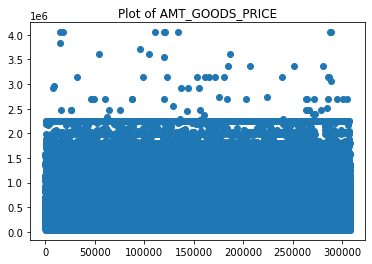

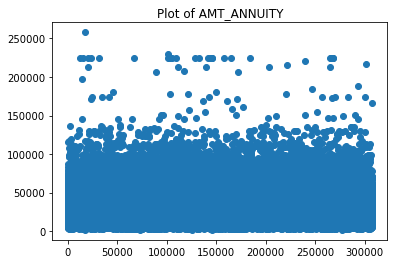

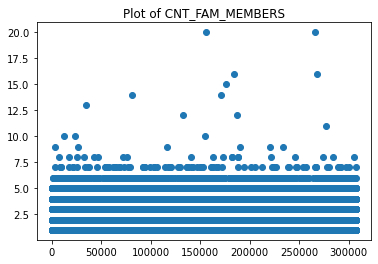

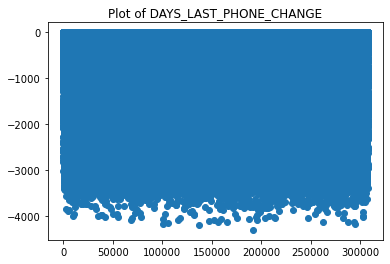

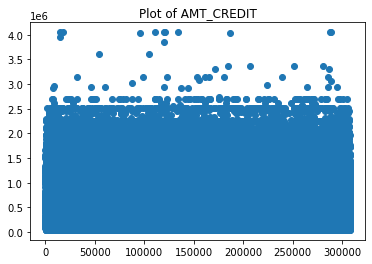

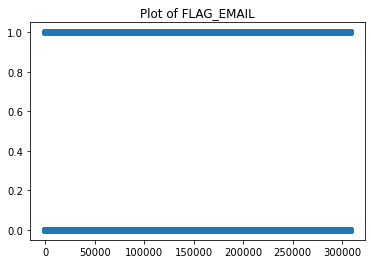

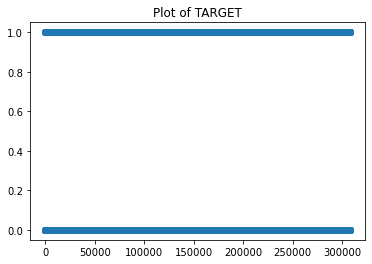

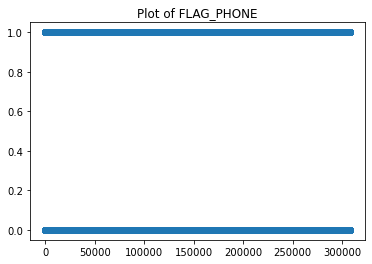

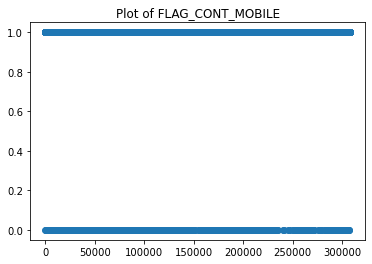

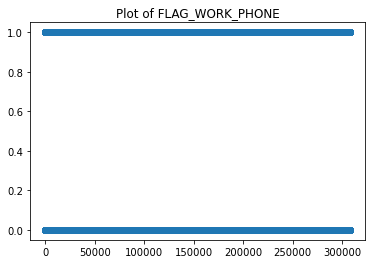

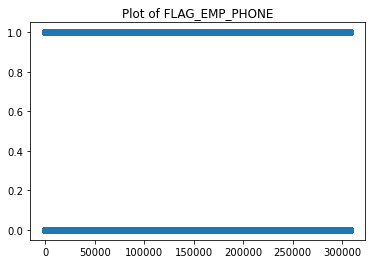

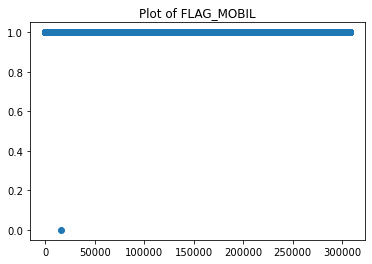

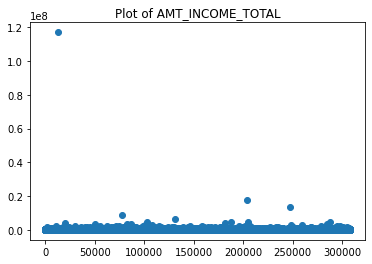

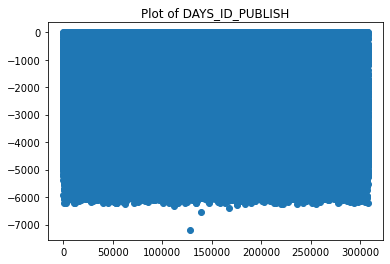

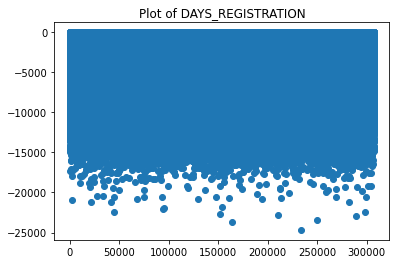

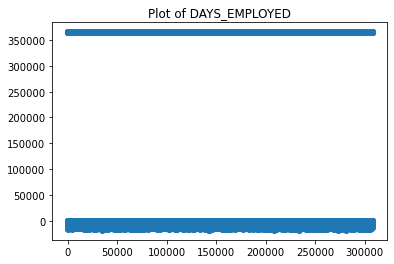

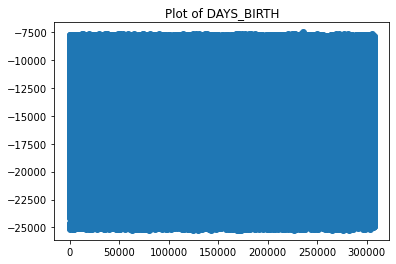

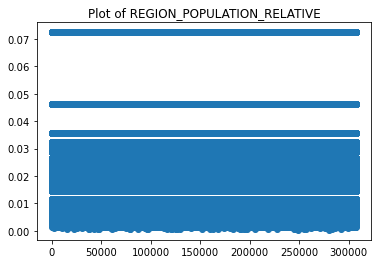

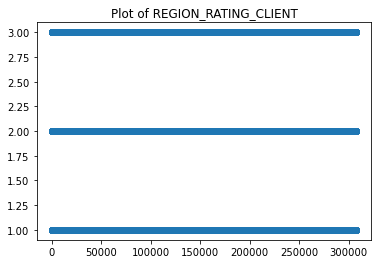

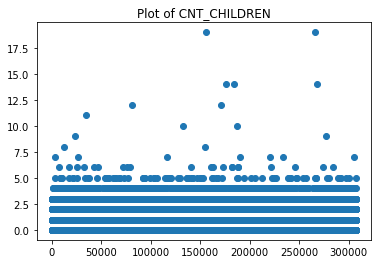

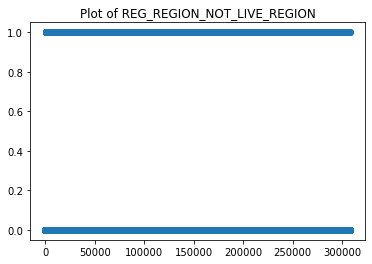

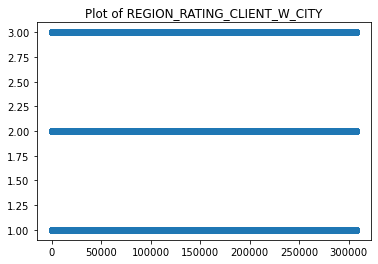

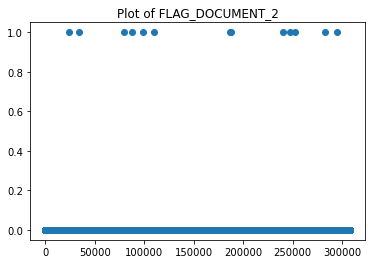

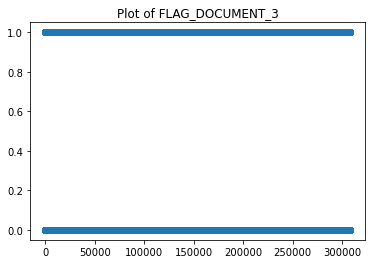

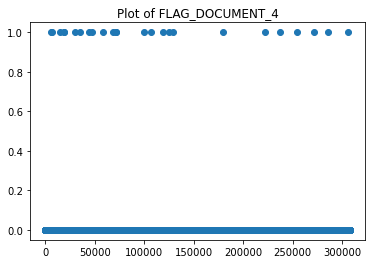

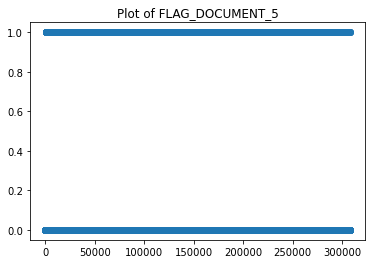

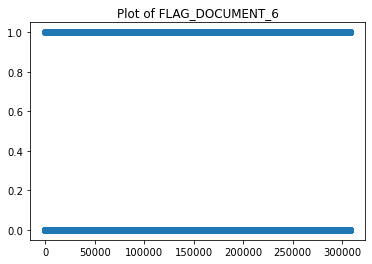

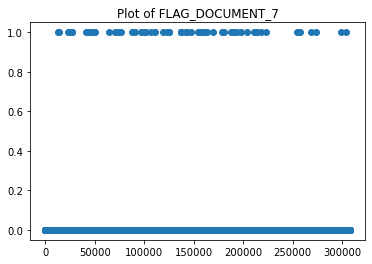

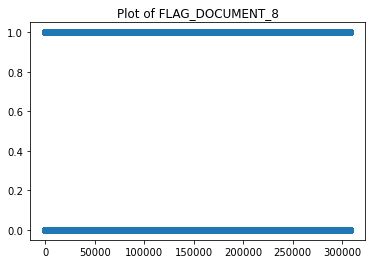

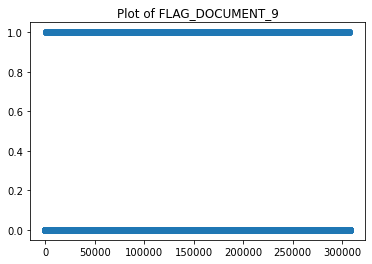

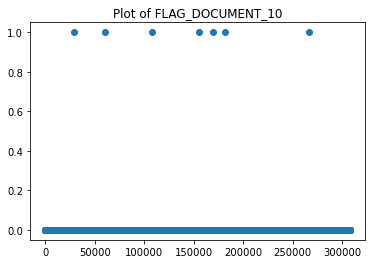

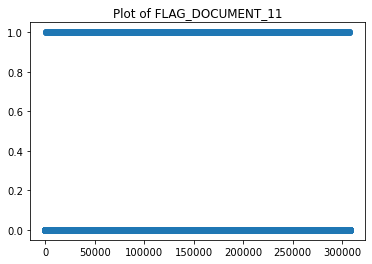

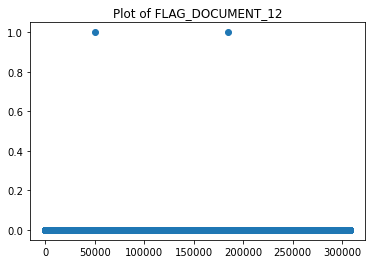

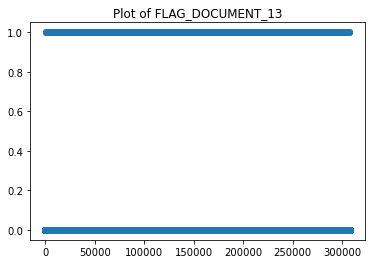

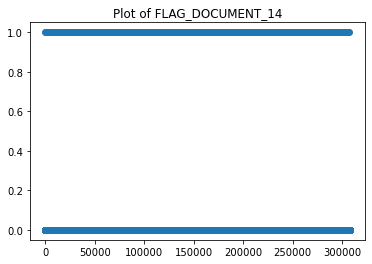

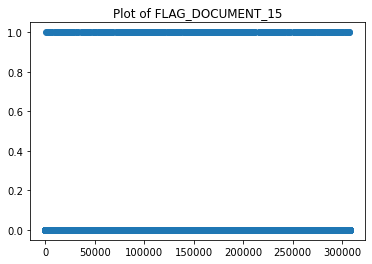

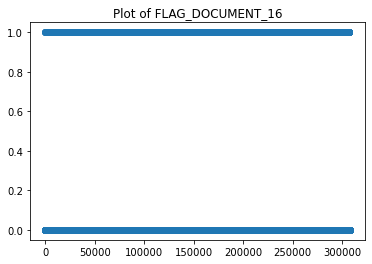

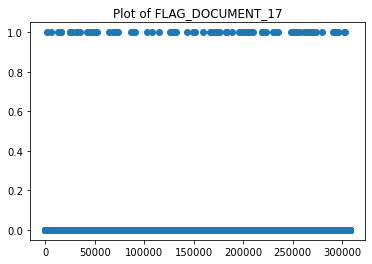

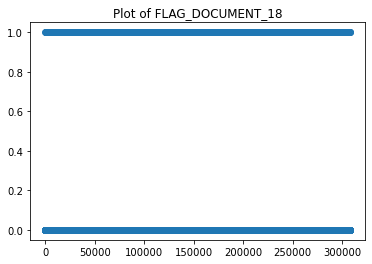

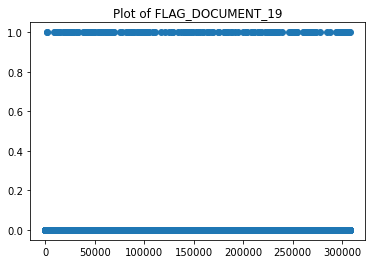

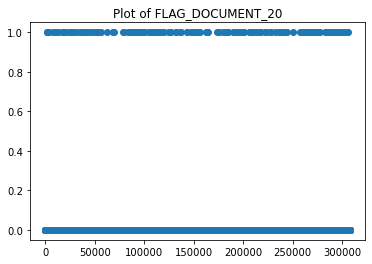

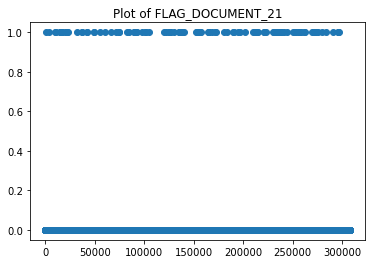

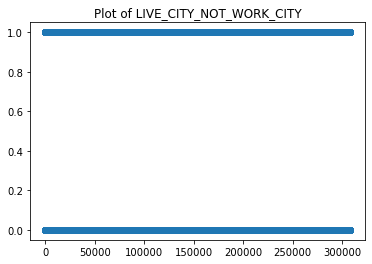

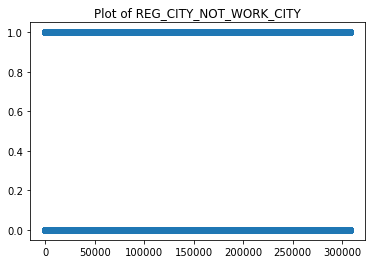

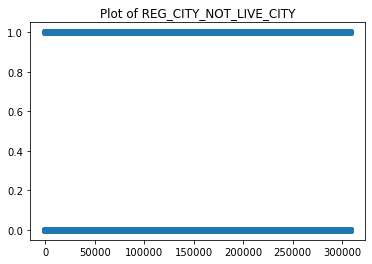

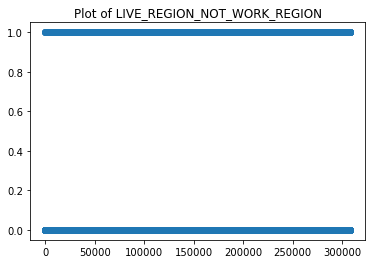

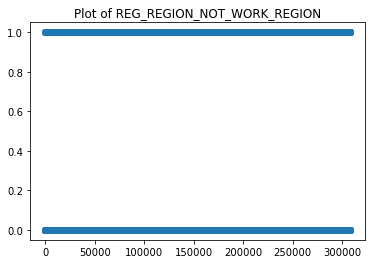

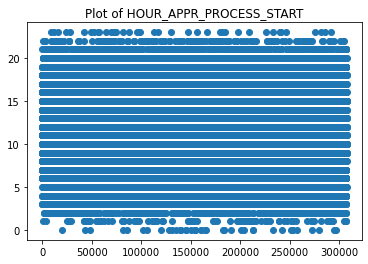

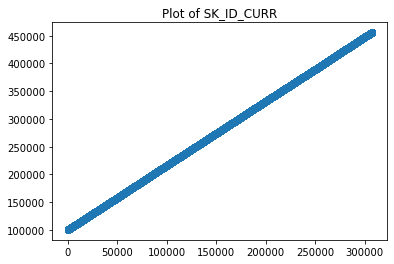

In [45]:
numerical= application_data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical:
    plt.scatter(application_data.index , application_data[column])
    plt.title("Plot of "+ column)
    plt.show();

##### Conclusion of Outlier Analysis

1. CNT_CHILDREN: In the CNT_CHILDREN plot , there is one value above 17 as humans cannot have so many children hence we will also consider this is an outlier.

2. DAYS_EMPLOYED: There is one value which is present here 350000.It might be due to manual error while data entry, hence we will treat this as an outlier.

3. AMT_INCOME_TOTAL: As max amount is way above the mean and 75th percentile, hence i will consider there are outliers present in this column.


##### Note : This notebook does not apply percentile based cutting discussed in strategy 1. We retain the outliers for our analysis in all further plots below. 

#### 4.4.1.2 Outlier Handling on Application_Data DataFrame -AMT_INCOME_TOTAL

In [46]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

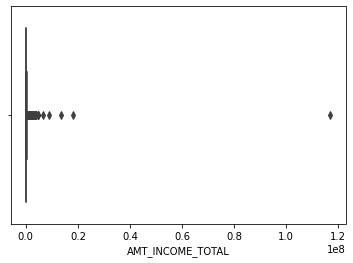

In [47]:
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

##### Comment:
We can bin the values in to groups of INCOME_GROUPS such as very low, low, medium, high, very high income groups.

In [48]:

labels=['very low','low','medium','high','very high']
application_data['INCOME_GROUP'] = pd.qcut(application_data.AMT_INCOME_TOTAL,q=5, labels= labels)

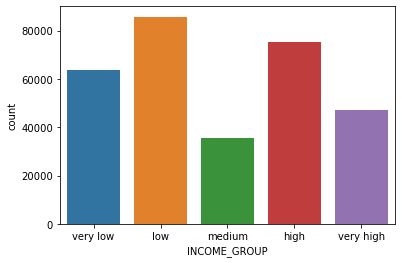

In [49]:
sns.countplot(application_data.INCOME_GROUP)
plt.show()

##### Comments:
We can see that the data is now defined as categorical values and hence would be easier for analysis. 

#### 4.5 Data Augmentation - Deriving Variables

There are a few variables that are best understood when converted to some derivative of it. Eg: DAYS_BIRTH can be converted to AGE and AGE GROUPS to understand this variable better.

In [50]:
application_data["AGE"] = abs(application_data.DAYS_BIRTH / 365)

In [51]:
application_data.AGE.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

##### Comment : 
We can segregate data into buckets further to Convert age to a categorical value.

In [52]:
group = [20,30,40,50,60,90]
labels = ['20-30','30-40','40-50','50-60','60+']
application_data['AGE_GROUP'] = pd.cut(application_data.AGE,bins=group,labels=labels)

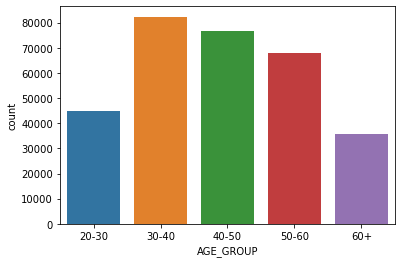

In [53]:
sns.countplot(application_data.AGE_GROUP)
plt.show()

In [54]:
#Creating the same for employment with DAYS_EMPLOYED

application_data['EMP_EXP'] = abs(application_data.DAYS_EMPLOYED / 365)
application_data.EMP_EXP.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: EMP_EXP, dtype: float64

##### Comment : 
Notice that there are values where the client has been employeed for more than 1000 years. 
This could be an issue with the quality of the data set and hence we can bucket this data to avoid outlier influence here. 

In [55]:
group = [0,5,10,15,1100]
labels = ['0-5','5-10','10-15','15+']
application_data['EMP_EXP_GROUP'] = pd.cut(application_data.EMP_EXP,bins=group,labels=labels)

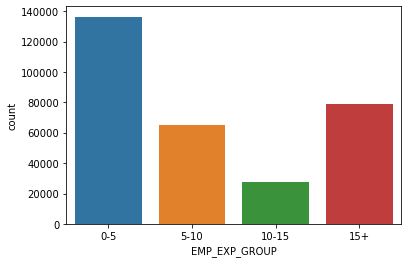

In [56]:
sns.countplot(application_data.EMP_EXP_GROUP)
plt.show()

### 5 : Analysis

#### 5.1 Univariate Analysis and Segmented Univariate Analysis.

Let's look at the data imbalance in the Target Varibale.

1 - Represents client with payment difficulties

0 - Represents clients with no payment difficulties 

From here on they will be refered to as 

1 - Defaulter

0 - Non-Defualter

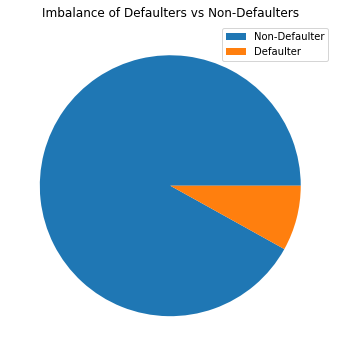

In [57]:
plt.figure(figsize=(7,6))
plt.pie(application_data.TARGET.value_counts())
plt.title("Imbalance of Defaulters vs Non-Defaulters")
plt.legend(['Non-Defaulter','Defaulter'])
plt.show()

In [58]:
Ratio = application_data.TARGET.value_counts()[0]/application_data.TARGET.value_counts()[1]

print("The Ratio of Defaulters to Non-Defaulter in this data is %F:1" %Ratio)
print("The Percentage of Defaulter is %F percent" %(application_data.TARGET.value_counts(normalize=True)[1]*100))

The Ratio of Defaulters to Non-Defaulter in this data is 11.387150:1
The Percentage of Defaulter is 8.072882 percent


#### 5.1.1 Univariate Analysis and Segmented Univariate Analysis on Categorical Variables

#### 5.1.1.1 Let's look at how the AGE group has issue with defaults.


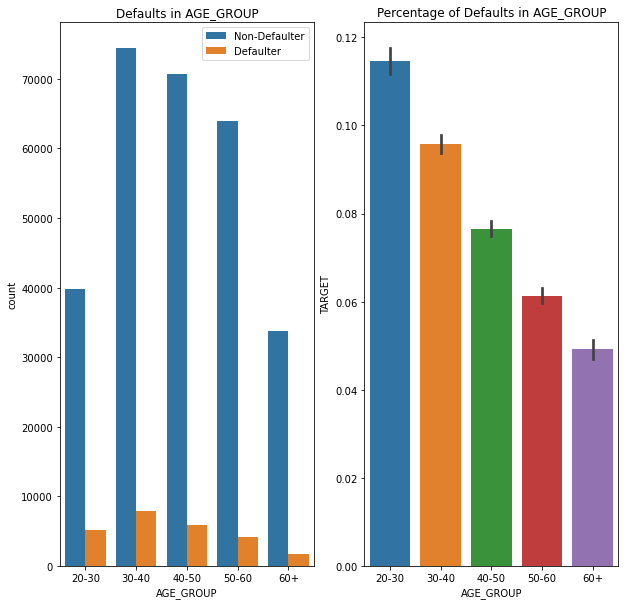

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.countplot(x='AGE_GROUP', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in AGE_GROUP')
plt.subplot(122)
sns.barplot(x='AGE_GROUP', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in AGE_GROUP')
plt.show()

##### Inference : 
1) Age group 20-30 has higher issues paying back the loan. 


#### 5.1.1.2 Let's look at how the GENDER has issue with defaults.

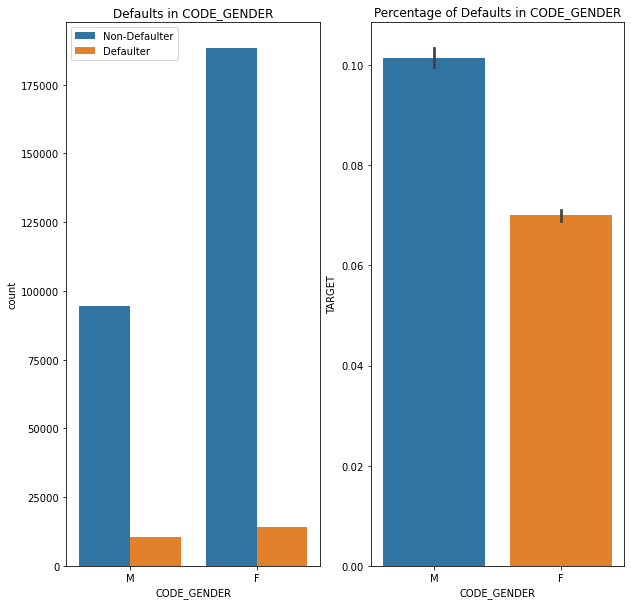

In [60]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.countplot(x='CODE_GENDER', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in CODE_GENDER')
plt.subplot(122)
sns.barplot(x='CODE_GENDER', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in CODE_GENDER')
plt.show()

##### Inference : 
1) Males have a higher issues with Loan Repayment about 10 percent 

2) Females have higher loan applications.

#### 5.1.1.2 Let's look at how the Employment Experience has issue with defaults.

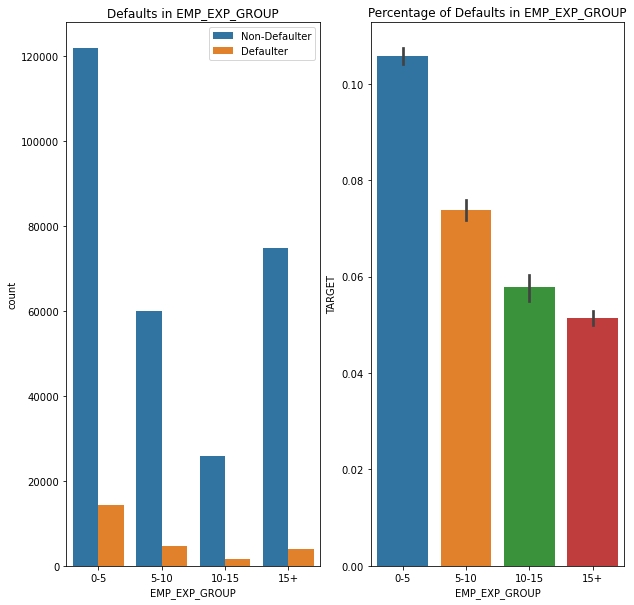

In [61]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.countplot(x='EMP_EXP_GROUP', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in EMP_EXP_GROUP')
plt.subplot(122)
sns.barplot(x='EMP_EXP_GROUP', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in EMP_EXP_GROUP')
plt.show()

##### Inference : 
1) Newly employed 0-5 experience have more loan applications. 

2) Newly employed 0-5 experience have more issues with loan repayment. 



#### 5.1.1.3 Let's look at how the NAME_TYPE_SUITE  has issue with defaults.

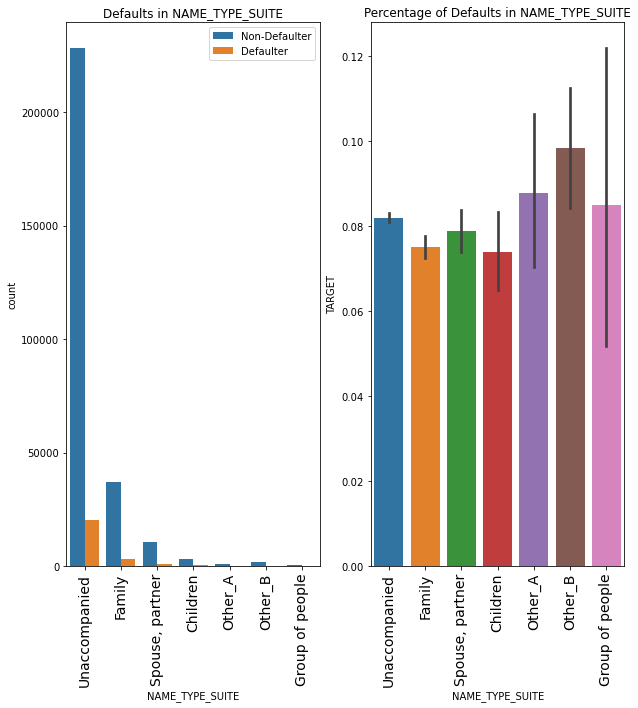

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.countplot(x='NAME_TYPE_SUITE', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.xticks(fontsize=14,rotation=90)
plt.title('Defaults in NAME_TYPE_SUITE')
plt.subplot(122)
sns.barplot(x='NAME_TYPE_SUITE', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in NAME_TYPE_SUITE')
plt.xticks(fontsize=14,rotation=90)
plt.show()

##### Inference : 
1) More Clients come unaccompained when applying for loans 

2) However there is no inference to be made they default more as the percentage of defaults is mostly uniform 

#### 5.1.1.4 Let's look at how the FLAG_OWN_REALTY  has issue with defaults.

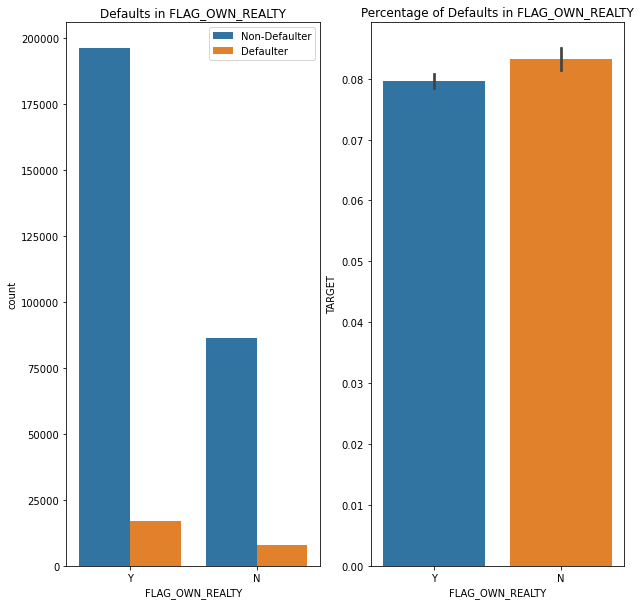

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.countplot(x='FLAG_OWN_REALTY', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in FLAG_OWN_REALTY')
plt.subplot(122)
sns.barplot(x='FLAG_OWN_REALTY', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in FLAG_OWN_REALTY')
plt.show()

##### Inference : 
1) More Clients come with  realty apply for loans 

2) Clients with no realty default more even though they don't apply for loans as much as someone with realty. 

#### 5.1.1.5 Let's look at how the OCCUPATION_TYPE  has issue with defaults.

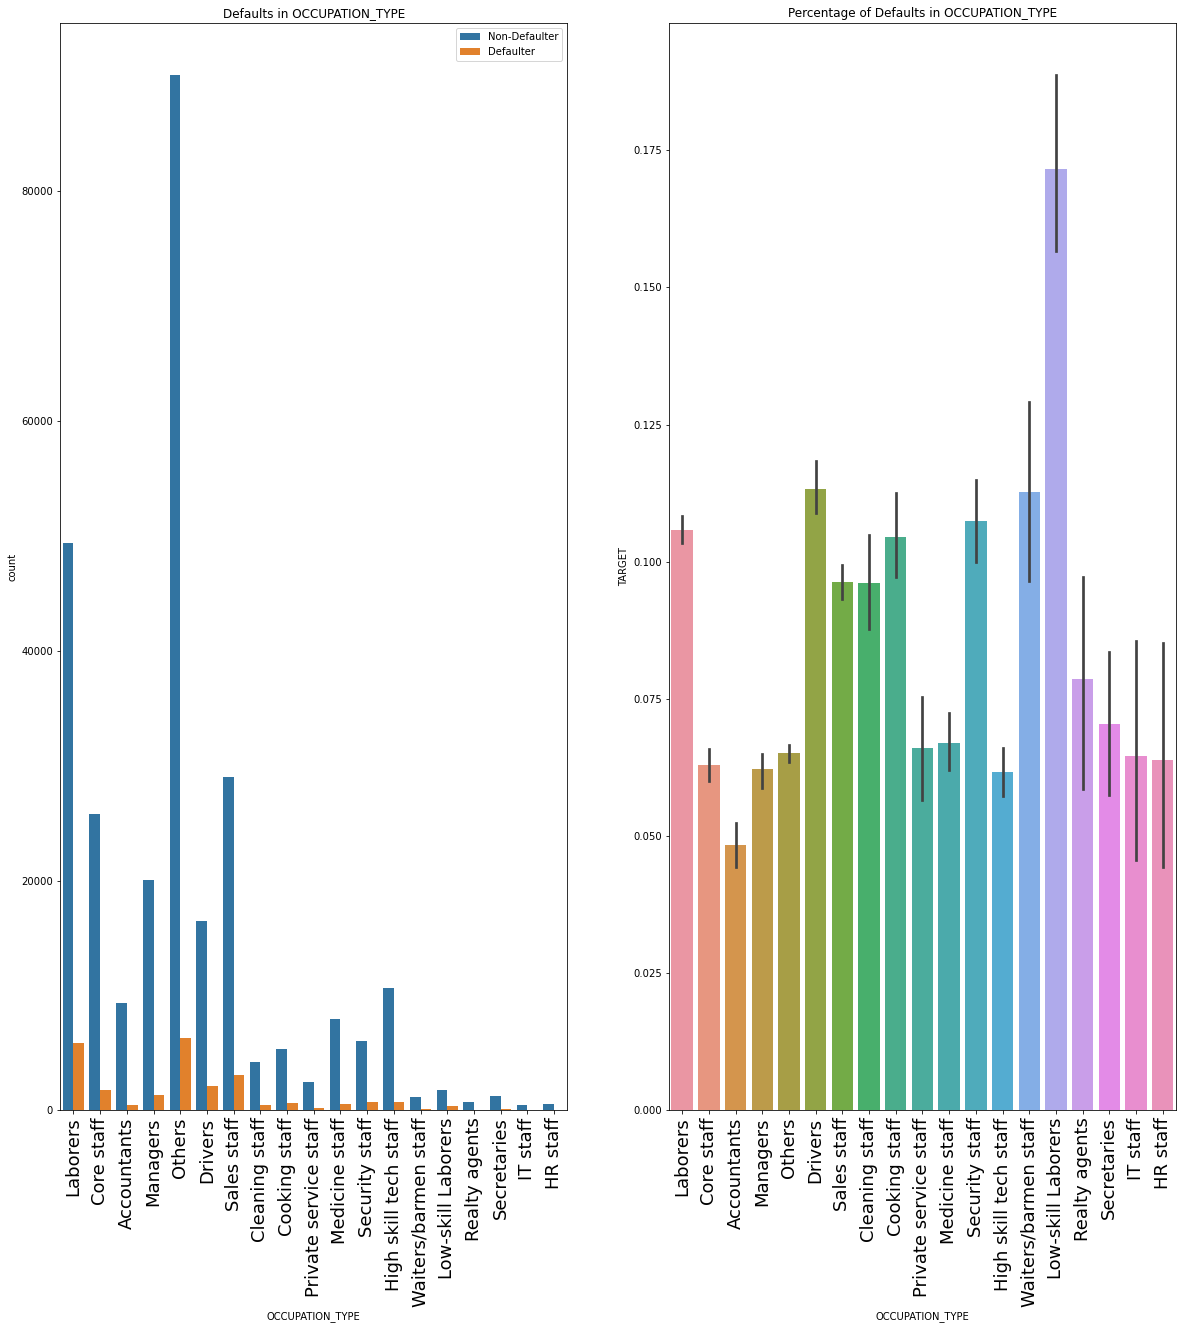

In [64]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='OCCUPATION_TYPE', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in OCCUPATION_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.subplot(122)
sns.barplot(x='OCCUPATION_TYPE', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in OCCUPATION_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.show()

##### Inference : 
1) We see that a lot clients with applications do not have their OCCUPATION_TYPE, since these were imputed we can't necessarily use them for an inference. The OCCUPATION_TYPE would be a good indicator for default if values were present. 

2) Majority of the loan applications are by clients that are Laborers.

3) There is a high default Rate between for clients that are categorized as Low-Skill Laboreres. 

#### 5.1.1.6 Let's look at how the NAME_FAMILY_STATUS has issue with defaults.


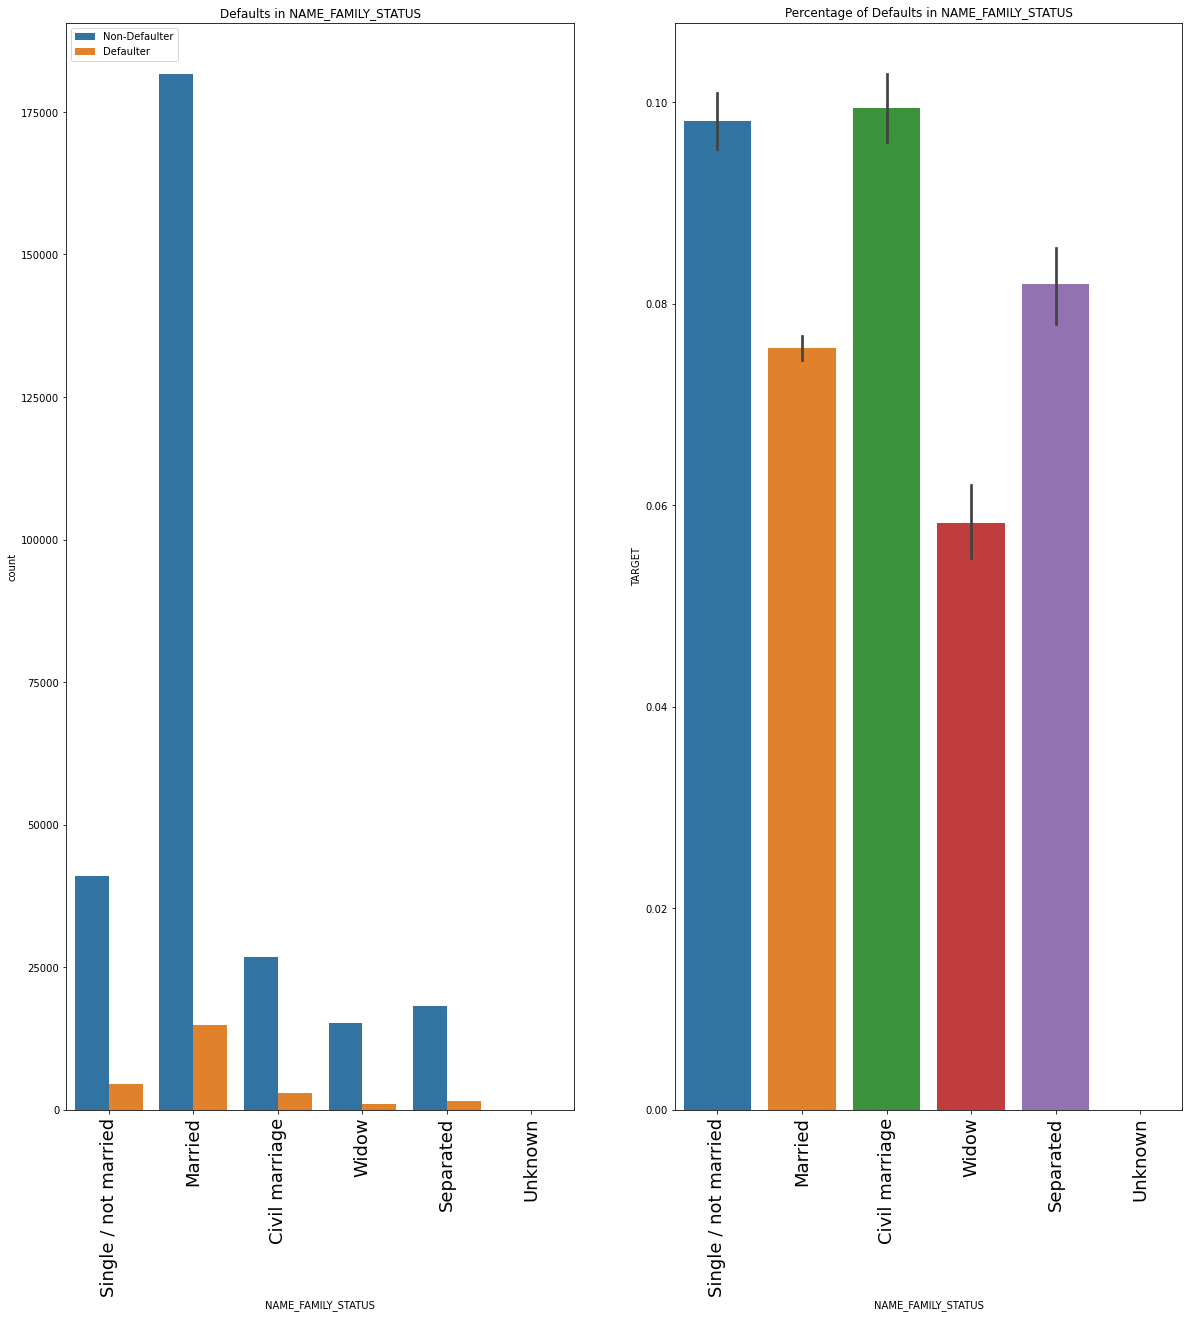

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='NAME_FAMILY_STATUS', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in NAME_FAMILY_STATUS')
plt.xticks(fontsize=18,rotation=90)
plt.subplot(122)
sns.barplot(x='NAME_FAMILY_STATUS', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in NAME_FAMILY_STATUS')
plt.xticks(fontsize=18,rotation=90)
plt.show()

##### Inference : 
1) Majority of the loan applications are by clients that are Married

2) Civil-Marriage and Single are the more defaulters. In this case Civil-Married individuals would default more as the number of their loan applications are quite low. Hence there is a higher risk. The next highest risk would be with the Single clients

#### 5.1.1.7 Let's look at how the NAME_EDUCATION_TYPE has issue with defaults.

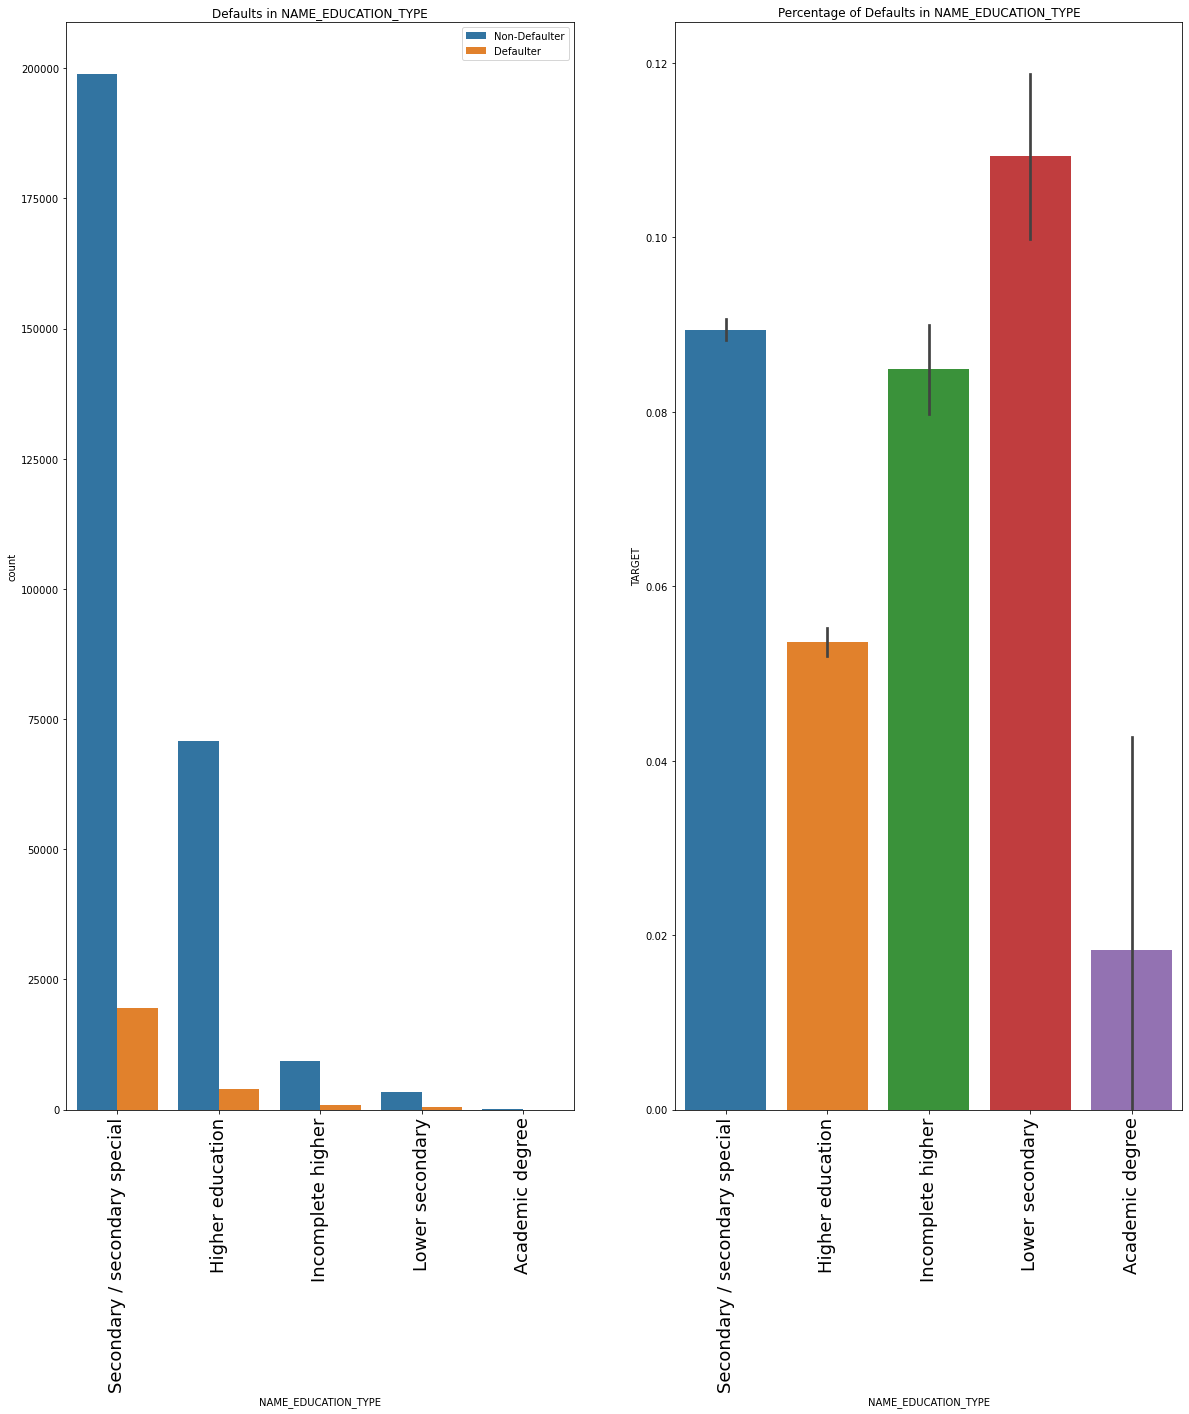

In [66]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='NAME_EDUCATION_TYPE', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in NAME_EDUCATION_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.subplot(122)
sns.barplot(x='NAME_EDUCATION_TYPE', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in NAME_EDUCATION_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.show()

##### Inference : 
1) Majority of the loan applications are by clients that have Secondary education

2) There is a high default Rate for cleitns with Lower Secondary Education even they comparitively don't apply for as much loan as the other educaiton segments. 

 #### 5.1.1.8 Let's look at how the NAME_INCOME_TYPE has issue with defaults.

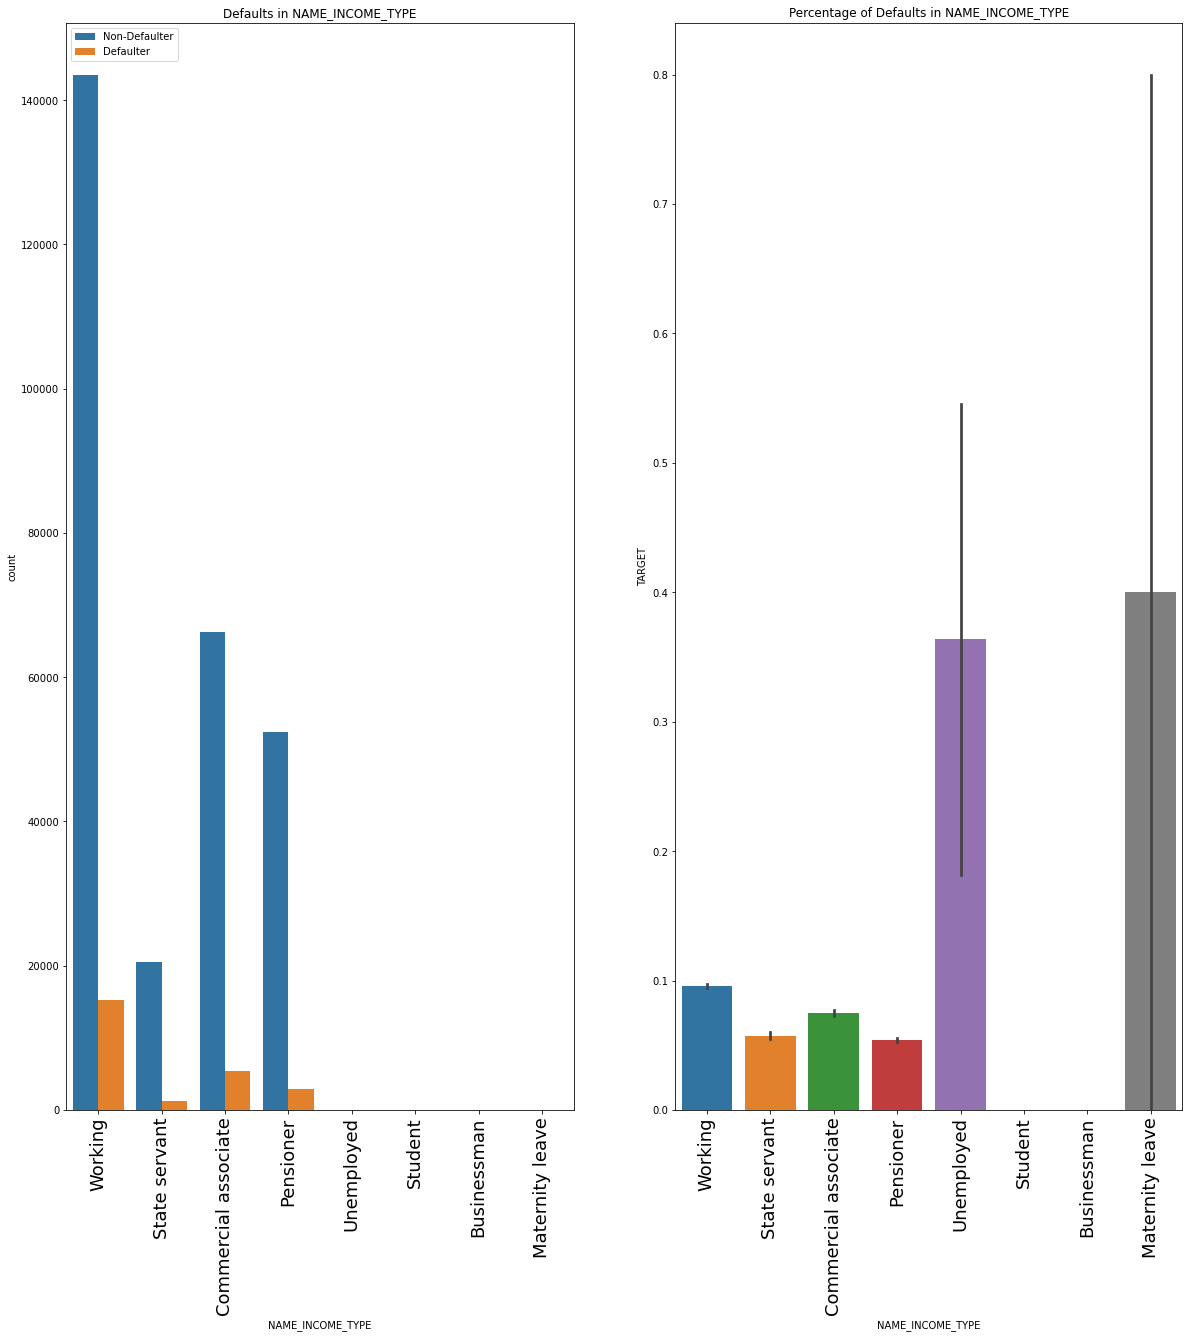

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='NAME_INCOME_TYPE', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in NAME_INCOME_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.subplot(122)
sns.barplot(x='NAME_INCOME_TYPE', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in NAME_INCOME_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.show()

##### Inference : 

1) There is a high default Rate between for clients that are on Maternity Leave or Unemployed.


#### 5.1.1.9 Let's look at how the REGION_RATING_CLIENT  has issue with defaults.

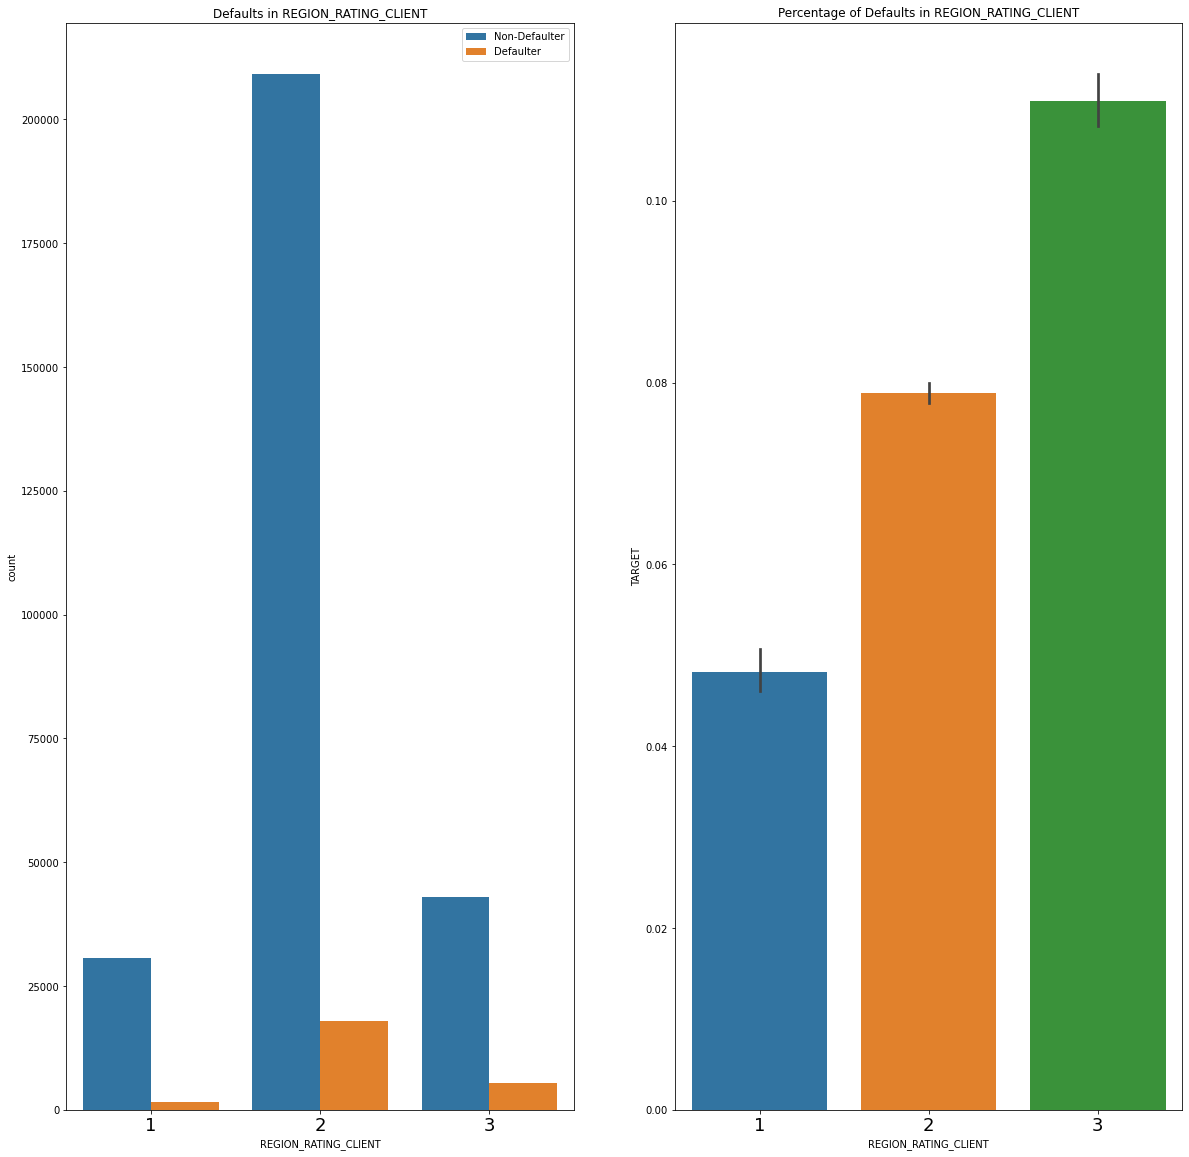

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='REGION_RATING_CLIENT', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in REGION_RATING_CLIENT')
plt.xticks(fontsize=18,rotation=0)
plt.subplot(122)
sns.barplot(x='REGION_RATING_CLIENT', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in REGION_RATING_CLIENT')
plt.xticks(fontsize=18,rotation=0)
plt.show()

##### Inference : 
1) Clients with a Region rating of 1 are safer clients. 

2) Clients with a Region rating of 3 are riskier clients. 

 #### 5.1.1.10 Let's look at how the REGION_RATING_CLIENT_W_CITY has issue with defaults.

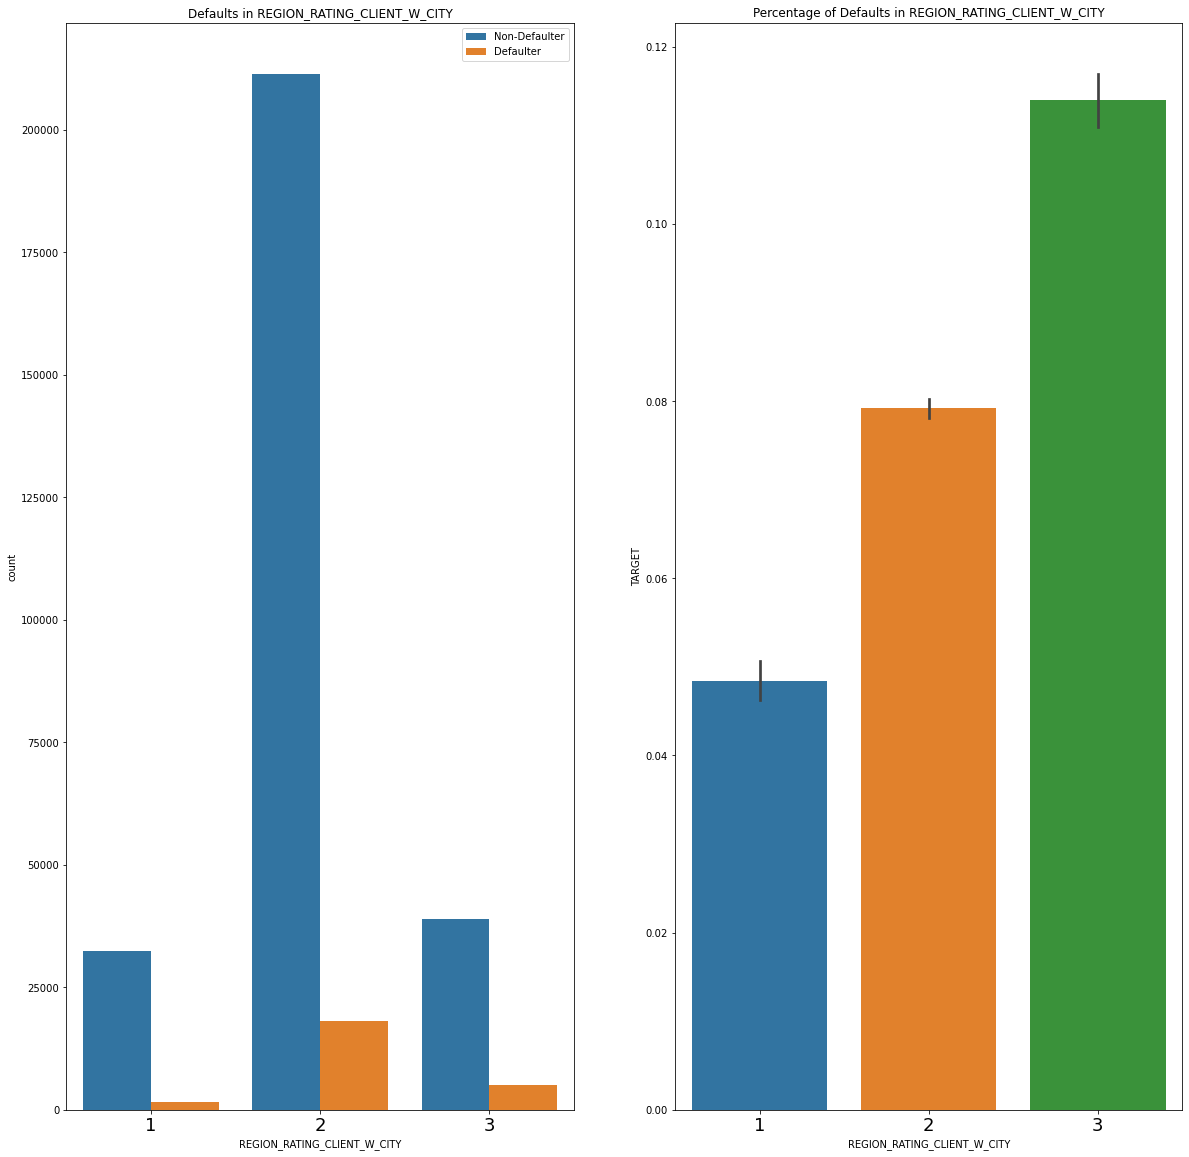

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in REGION_RATING_CLIENT_W_CITY')
plt.xticks(fontsize=18,rotation=0)
plt.subplot(122)
sns.barplot(x='REGION_RATING_CLIENT_W_CITY', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in REGION_RATING_CLIENT_W_CITY')
plt.xticks(fontsize=18,rotation=0)
plt.show()

##### Inference : 
Same as the inference from REGION_RATING_CLIENT

#### 5.1.1.11 Let's look at how the REG_CITY_NOT_WORK_CITY has issue with defaults.

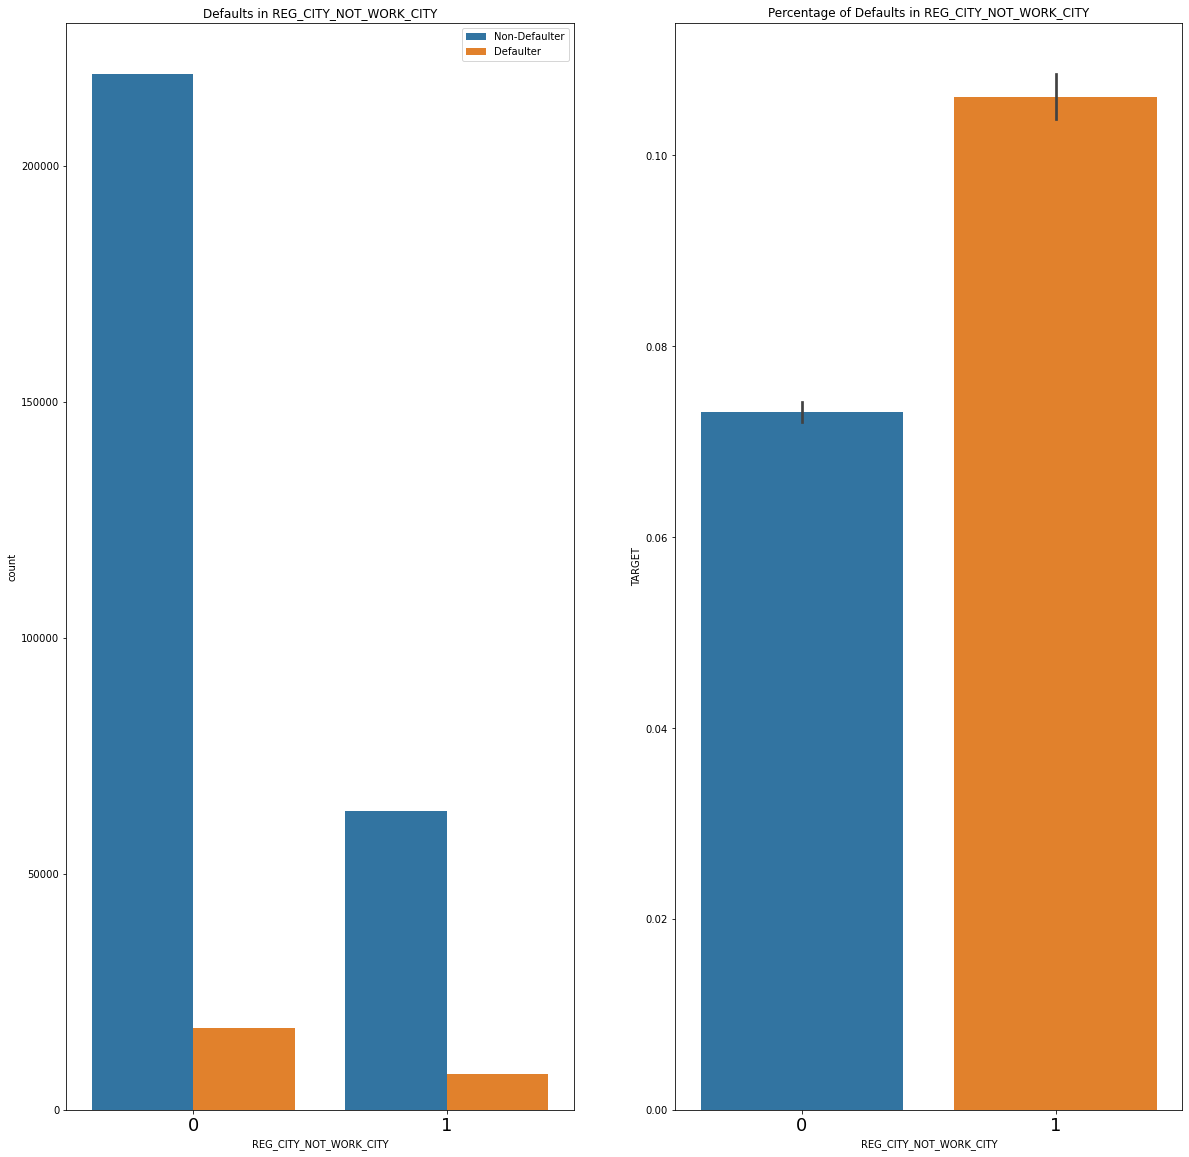

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='REG_CITY_NOT_WORK_CITY', data=application_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in REG_CITY_NOT_WORK_CITY')
plt.xticks(fontsize=18,rotation=0)
plt.subplot(122)
sns.barplot(x='REG_CITY_NOT_WORK_CITY', data=application_data, y='TARGET')
plt.title('Percentage of Defaults in REG_CITY_NOT_WORK_CITY')
plt.xticks(fontsize=18,rotation=0)
plt.show()

##### Inference : 
1) Majority of the loan applications are by clients that are in the same city as they work.

2) There is a high default Rate between for clients that are taking loans in city where they do not work.  

#### 5.1.2 Univariate Analysis on Numerical Variables

#### 5.1.2.1 Let's look at how the AMT_INCOME_TOTAL has issue with defaults.

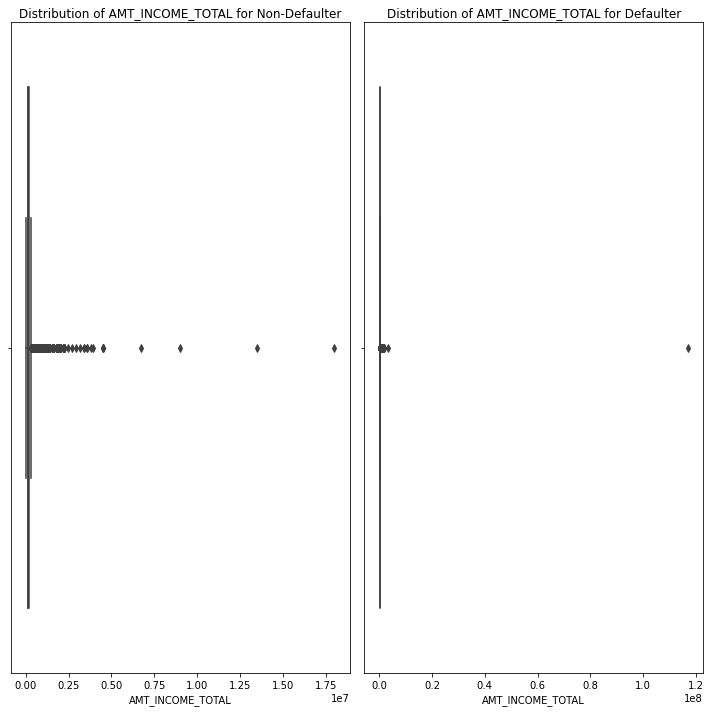

In [110]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.boxplot(application_data[(application_data.TARGET==0 )].AMT_INCOME_TOTAL)
plt.title("Distribution of AMT_INCOME_TOTAL for Non-Defaulter")

plt.subplot(122)
sns.boxplot(application_data[(application_data.TARGET==1)].AMT_INCOME_TOTAL)
plt.title("Distribution of AMT_INCOME_TOTAL for Defaulter")
plt.tight_layout()
plt.show()

##### Inference : 
1) There are values that influence the data to a huge extent, the presence of outliers needs to be managed.


 #### 5.1.2.2 Let's look at how the AMT_CREDIT has issue with defaults.

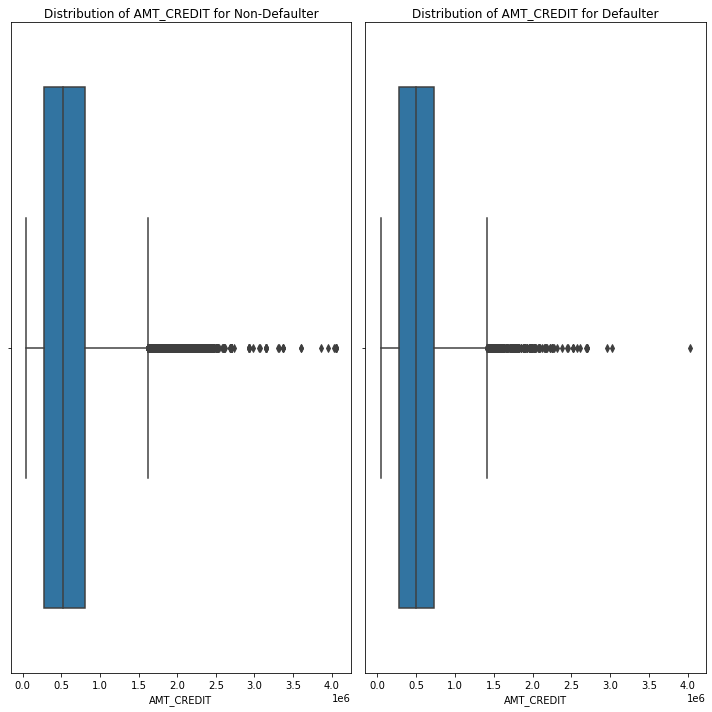

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.boxplot(application_data[(application_data.TARGET==0 )].AMT_CREDIT)
plt.title("Distribution of AMT_CREDIT for Non-Defaulter")

plt.subplot(122)
sns.boxplot(application_data[(application_data.TARGET==1) ].AMT_CREDIT)
plt.title("Distribution of AMT_CREDIT for Defaulter")
plt.tight_layout()
plt.show()

##### Inference : 
1) After handling outliers, there is no much difference in how the income is distributed in the defaulters and non-defaulters.


#### 5.1.2.3 Let's look at how the AMT_ANNUITY has issue with defaults.

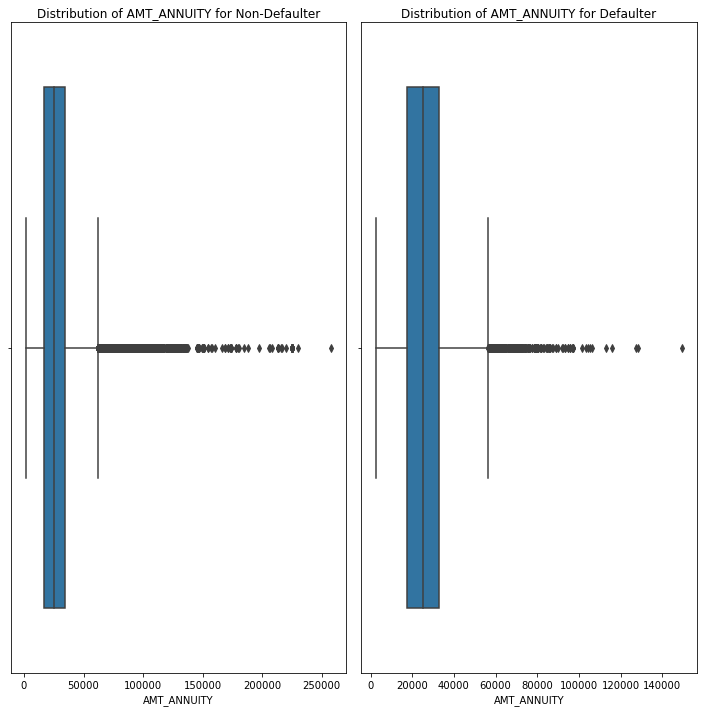

In [73]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.boxplot(application_data[(application_data.TARGET==0 )].AMT_ANNUITY)
plt.title("Distribution of AMT_ANNUITY for Non-Defaulter")

plt.subplot(122)
sns.boxplot(application_data[(application_data.TARGET==1) ].AMT_ANNUITY)
plt.title("Distribution of AMT_ANNUITY for Defaulter")
plt.tight_layout()
plt.show()

##### Inference : 
1) There seems to be higher defaulters when the Annuity offered is higher

#### 5.2 Bivariate Analysis 

#### 5.2.1 Numerical-Numerical Analysis

#### 5.2.1.1 Numerical-Numerical Analysis - Let's look at all the numerical values correlations

In [74]:
numerical_cols =  ['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','AGE','EMP_EXP','REGION_POPULATION_RELATIVE','REG_CITY_NOT_WORK_CITY']

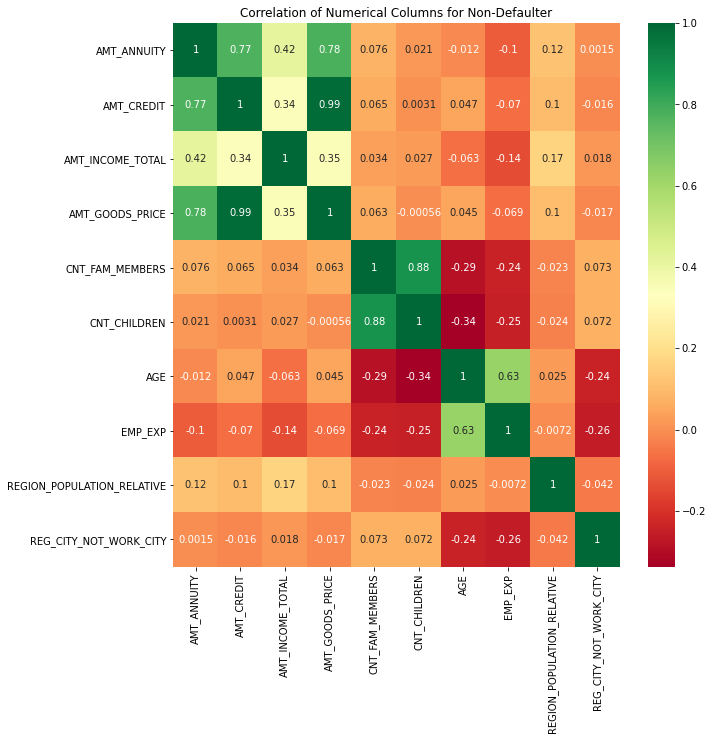

In [75]:
app_numerical_corr_0 = (application_data.loc[application_data.TARGET==0,numerical_cols].corr())
plt.figure(figsize=(10,10))
sns.heatmap(app_numerical_corr_0,cmap="RdYlGn",annot=True)
plt.title("Correlation of Numerical Columns for Non-Defaulter")
plt.show()

##### Inference : 
1) We see good correlation for AMT_CREDIT with AMT_GOODS_PRICE, AMT_ANNUITY and  AMT_INCOME_TOTAL

2) We see a low correlation for AMT_INCOME_TOTAL and REGION_POPULATION_RELATIVE

3) The correlation values are misleading since a few of these variables are categorical in nature.. There might be no causation in reality. 


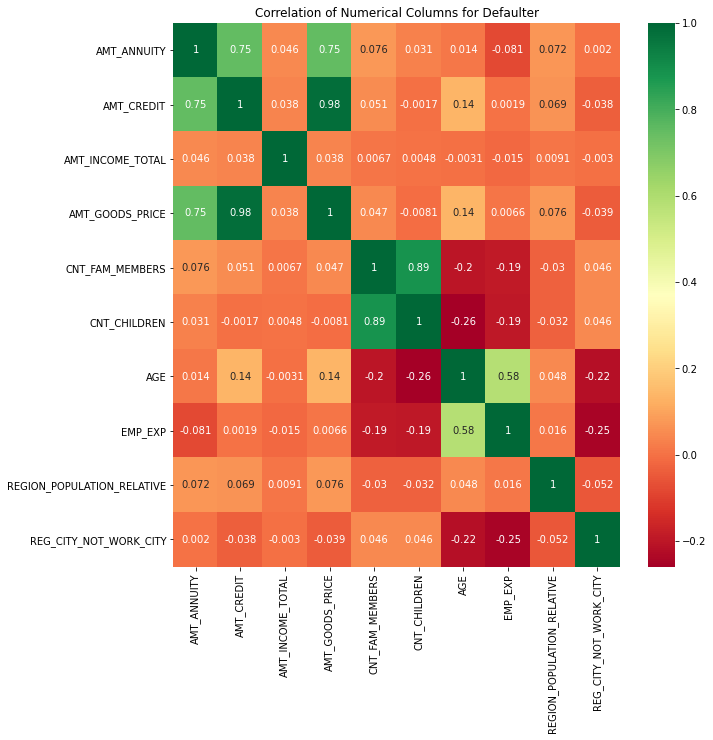

In [76]:
app_numerical_corr_1 = (application_data.loc[application_data.TARGET==1,numerical_cols].corr())
plt.figure(figsize=(10,10))
sns.heatmap(app_numerical_corr_1,cmap="RdYlGn",annot=True)
plt.title("Correlation of Numerical Columns for Defaulter")
plt.show()

##### Inference : 
1) We see a good correlation for AMT_CREDIT with AMT_GOODS_PRICE and AMT_ANNUITY for Defaulters

2) We see a low correlation for AMT_GOODS_PRICE and AGE and AMT_CREDIT and REGION_POPULATION_RELATIVE

3) The correlation values are misleading since a few of these variables are categorical in nature. There might be no causation in reality. 

In [77]:
cols = application_data.describe().columns
cols = cols.drop('TARGET')

app_corr0 = application_data[application_data.TARGET==0]
app_corr1 = application_data[application_data.TARGET==1]
app_corr0 = app_corr0.loc[:,cols].corr()
app_corr1 = app_corr1.loc[:,cols].corr()


#### 5.2.1.2 Numerical-Numerical Analysis - Let's analyse the Correlation for Defaulters and List the top 10 Correlations

In [78]:
k = pd.DataFrame(app_corr1.unstack().drop_duplicates())
k = k.reset_index()
k.columns = ['Var1','Var2','Corr_Value_Defaulter']
k = k[k != 1.000000]
k.sort_values(by='Corr_Value_Defaulter',ascending=False).head(10)

,Var1,Var2,Corr_Value_Defaulter
1571,DAYS_EMPLOYED,EMP_EXP,0.999574
793,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998269
66,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187
191,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124
1,FLOORSMAX_MODE,FLOORSMAX_MEDI,0.989195
2,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594
1036,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
252,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,0.980466
192,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073
1635,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637


#### 5.2.1.3 Numerical-Numerical Analysis -  Let's analyse the Correlation for Non-Defaulters and List the top 10 Correlations

In [79]:
k = pd.DataFrame(app_corr0.unstack().drop_duplicates())
k = k.reset_index()
k.columns = ['Var1','Var2','Corr_Value_Non-Defaulter']
k = k[k != 1.000000]
k.sort_values(by='Corr_Value_Non-Defaulter',ascending=False).head(10)

,Var1,Var2,Corr_Value_Non-Defaulter
1736,DAYS_EMPLOYED,EMP_EXP,0.999545
849,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998508
69,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018
202,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582
1,FLOORSMAX_MODE,FLOORSMAX_MEDI,0.988153
1111,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
2,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985603
267,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,0.971032
203,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064
1806,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149


#### 5.2.1.4 Numerical-Numerical Analysis - Let's look at AMT_ANNUITY vs AMT_CREDIT

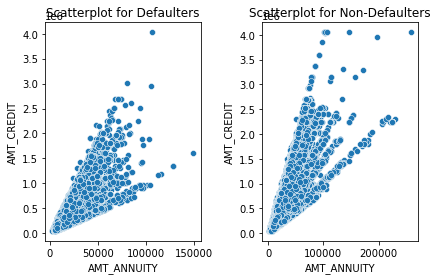

In [80]:
Target_1 = application_data[application_data.TARGET==1]
Target_0 = application_data[application_data.TARGET==0]

plt.subplot(121)
sns.scatterplot(Target_1.AMT_ANNUITY,Target_1.AMT_CREDIT)
plt.title("Scatterplot for Defaulters")
plt.subplot(122)
sns.scatterplot(Target_0.AMT_ANNUITY,Target_0.AMT_CREDIT)
plt.title("Scatterplot for Non-Defaulters")
plt.tight_layout()
plt.show()

##### Inference : 
1) We see a good positive relation ship between AMT_ANNUITY and AMT_CREDIT

2) We see the defaults drop when Annuity Offered is more than 2500000 and Credit more than 50000


#### 5.2.1.5 Numerical-Numerical Analysis - Let's look at AMT_ANNUITY vs AMT_INCOME_TOTAL

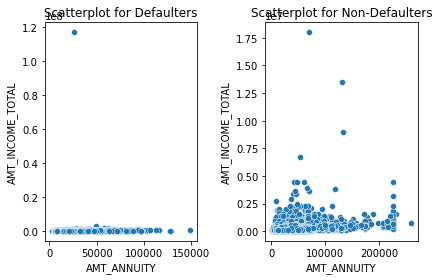

In [81]:

plt.subplot(121)
sns.scatterplot(Target_1.AMT_ANNUITY,Target_1.AMT_INCOME_TOTAL)
plt.title("Scatterplot for Defaulters")
plt.subplot(122)
sns.scatterplot(Target_0.AMT_ANNUITY,Target_0.AMT_INCOME_TOTAL)
plt.title("Scatterplot for Non-Defaulters")
plt.tight_layout()
plt.show()

##### Inference : 
1) We don't see any strong relationship in these values.


#### 5.2.1.6 Numerical-Numerical Analysis - Let's look at AMT_INCOME_TOTAL vs AMT_GOODS_PRICE

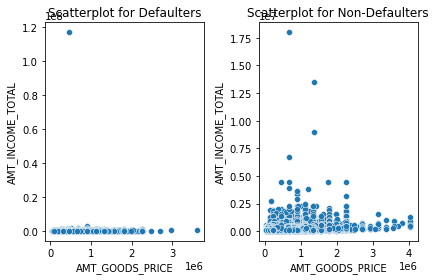

In [82]:

plt.subplot(121)
sns.scatterplot(Target_1.AMT_GOODS_PRICE,Target_1.AMT_INCOME_TOTAL)
plt.title("Scatterplot for Defaulters")
plt.subplot(122)
sns.scatterplot(Target_0.AMT_GOODS_PRICE,Target_0.AMT_INCOME_TOTAL)
plt.title("Scatterplot for Non-Defaulters")
plt.tight_layout()
plt.show()

##### Inference : 
1) We don't see any strong relationship in these values.


#### 5.2.1.7 Numerical-Numerical Analysis - Let's look at AMT_CREDIT vs AMT_GOODS_PRICE

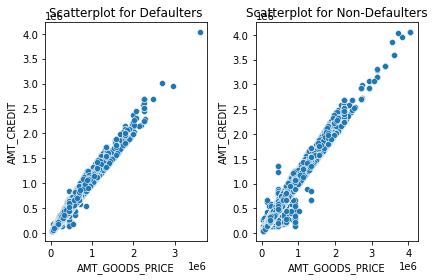

In [83]:
plt.subplot(121)
sns.scatterplot(Target_1.AMT_GOODS_PRICE,Target_1.AMT_CREDIT)
plt.title("Scatterplot for Defaulters")
plt.subplot(122)
sns.scatterplot(Target_0.AMT_GOODS_PRICE,Target_0.AMT_CREDIT)
plt.title("Scatterplot for Non-Defaulters")
plt.tight_layout()
plt.show()

##### Inference : 
1) We see a correlation for AMT_CREDIT and AMT_GOODS_PRICE

2) We see a drop of Default for Goods price > 2,500,000 and Credit > 2,500,000


#### 5.2.2 Numerical-Categorical Analysis

#### 5.2.2.1 Numerical-Categorical Analysis - Let's look at AMT_CREDIT vs NAME_INCOME_TYPE for Defaulters

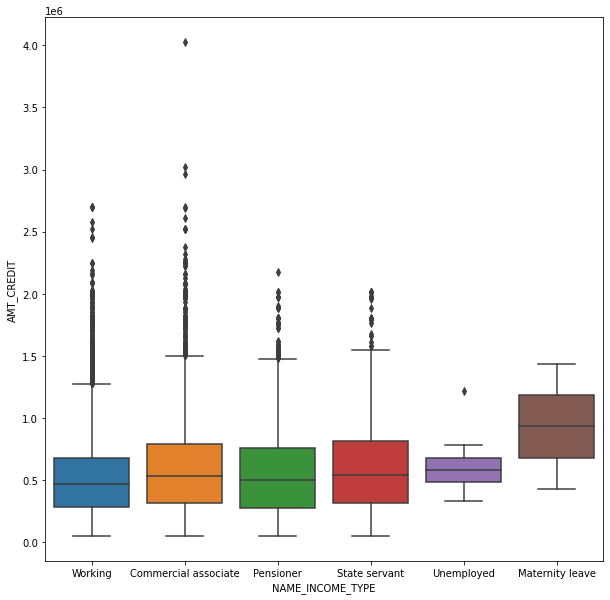

In [84]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Target_1, x='NAME_INCOME_TYPE',y='AMT_CREDIT' , orient='v')
plt.show()

##### Inference : 
1) We see that there are NAME_INCOME_TYPE with Materinity Leave contributes to the highest amount of credit and has issues with paying it back. 


#### 5.2.2.2 Numerical-Categorical Analysis - Let's look at AMT_CREDIT vs OCCUPATION_TYPE

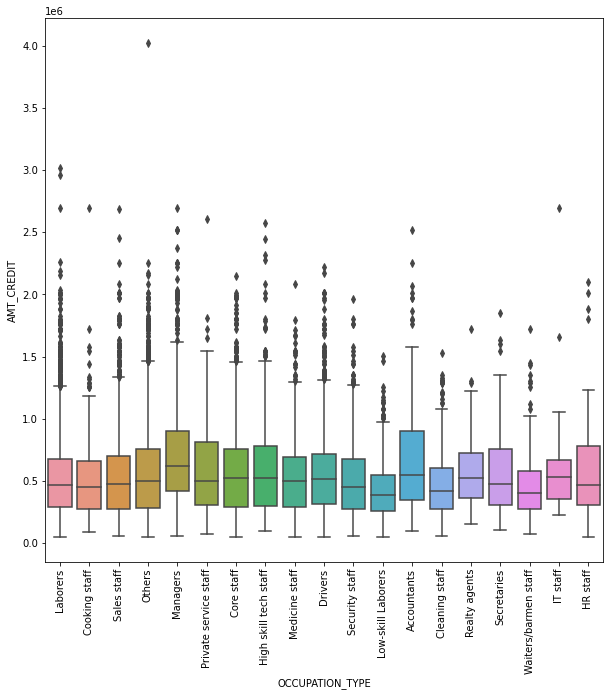

In [85]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Target_1, x='OCCUPATION_TYPE',y='AMT_CREDIT' , orient='v')
plt.xticks(rotation=90)
plt.show()

##### Inference : 
1) We see that there are OCCUPATION_TYPE with Accountant and Manger contributes to the highest amount of credit and may have issues with paying it back. 


#### 5.2.2.3 Numerical-Categorical Analysis - Let's look at AMT_GOODS_PRICE vs NAME_FAMILY_STATUS

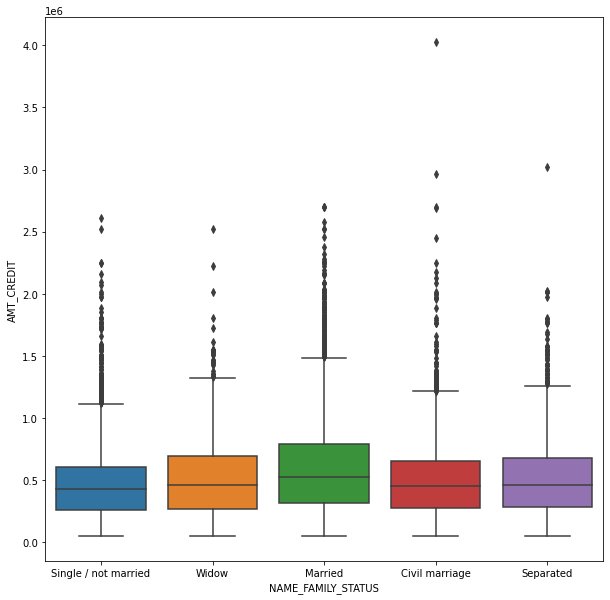

In [86]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Target_1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT' , orient='v')
plt.show()

##### Inference : 
1) We see that there are NAME_FAMILY_STATUS with Married contributes to the highest amount of credit and has issues with paying it back. 


#### 5.2.2.4 Numerical-Categorical Analysis - Let's look at AMT_INCOME_TOTAL vs NAME_INCOME_TYPE

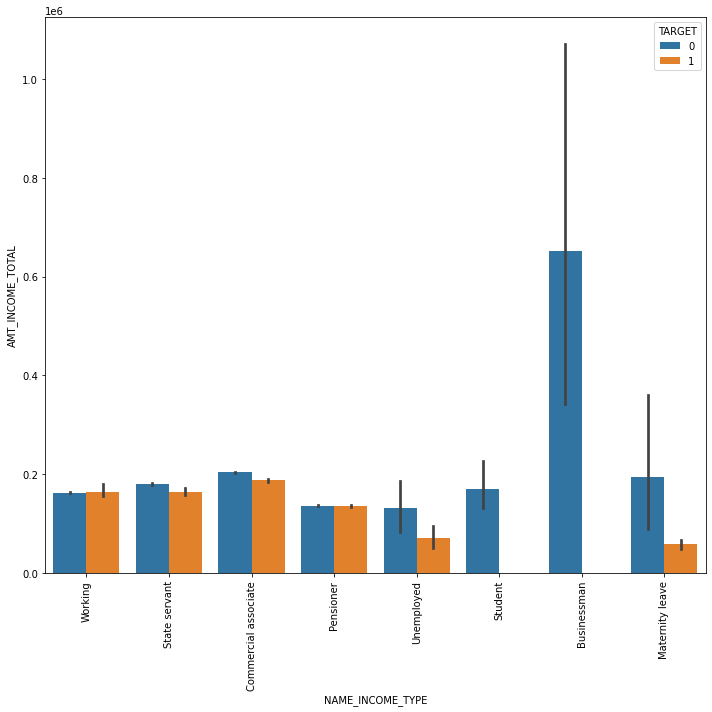

In [87]:
plt.figure(figsize=(10,10))
sns.barplot(data = application_data, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.xticks(rotation=90)
plt.legend(title='TARGET')
plt.tight_layout()
plt.show()

##### Inference : 
1) Buissnessmen and Students have the lowest risk of defaulting. 

#### 5.2.2.4 Numerical-Categorical Analysis - Let's look at AMT_CREDIT vs NAME_EDUCATION_TYPE on how they repay

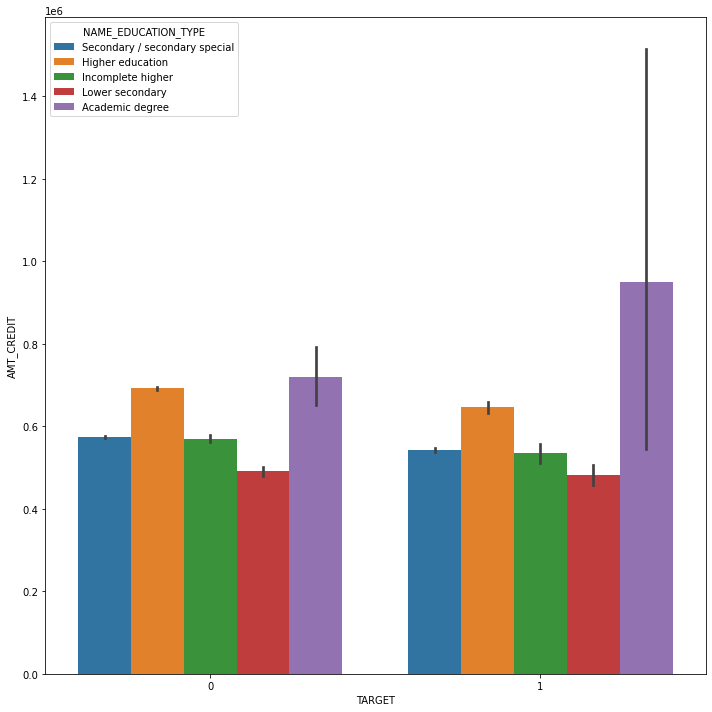

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(data = application_data, x='TARGET',y='AMT_CREDIT',hue='NAME_EDUCATION_TYPE')
plt.xticks(rotation=0)
plt.legend(title='NAME_EDUCATION_TYPE')
plt.tight_layout()
plt.show()

##### Inference : 
1) Clients with Accademic Degrees are riskier and higher Credit

#### 5.2.2.4 Numerical-Categorical Analysis - Let's look at AMT_GOODS_PRICE vs NAME_INCOME_TYPE 

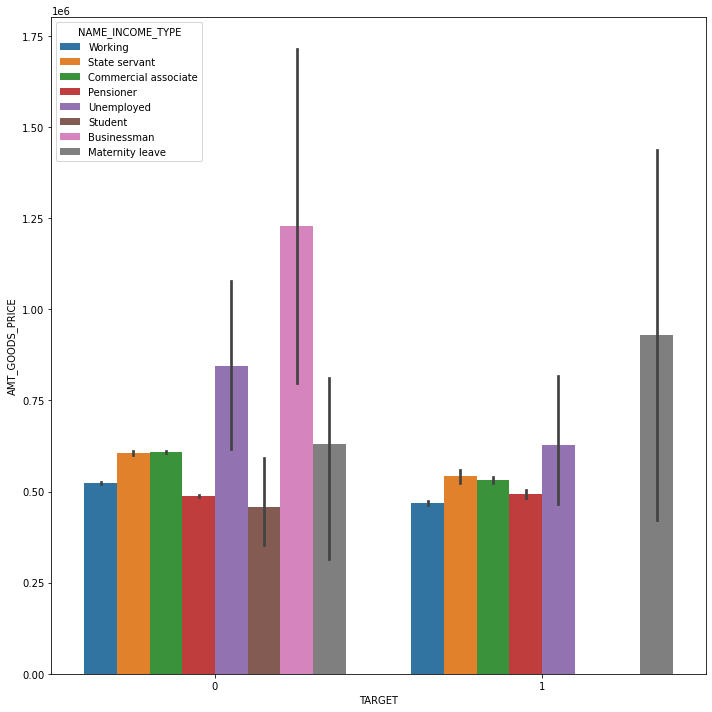

In [89]:
plt.figure(figsize=(10,10))
sns.barplot(data = application_data, x='TARGET',y='AMT_GOODS_PRICE',hue='NAME_INCOME_TYPE')
plt.xticks(rotation=0)
plt.legend(title='NAME_INCOME_TYPE')
plt.tight_layout()
plt.show()

##### Inference : 
1) We see that the Maternity Leave and unemployed group having higher default rates with respect to the goods price. 

2) Whereas Businessman and Students don't default as much, this could be due to not having wider data points of them defaulting for this segment or they might be the safest clients

#### 5.2.2.4 Numerical-Categorical Analysis - Let's look at AMT_CREDIT vs NAME_FAMILY_STATUS

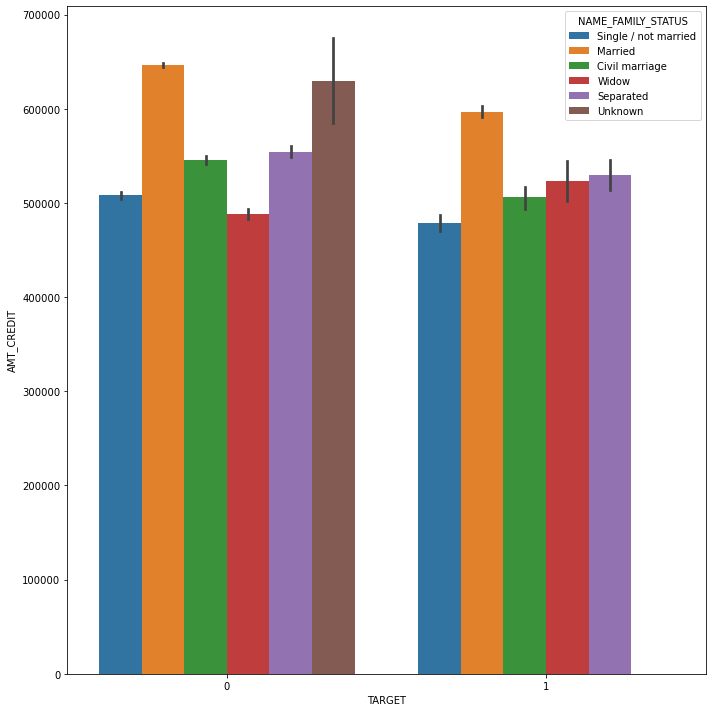

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(data = application_data, x='TARGET',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')
plt.xticks(rotation=0)
plt.legend(title='NAME_FAMILY_STATUS')
plt.tight_layout()
plt.show()

##### Inference : 
1) Married clients with a high Credit value  have a risk of defaulting

#### 5.2.2.5 Numerical-Categorical Analysis - Let's look at AMT_GOODS_PRICE  vs NAME_EDUCATION_TYPE for Defaulters

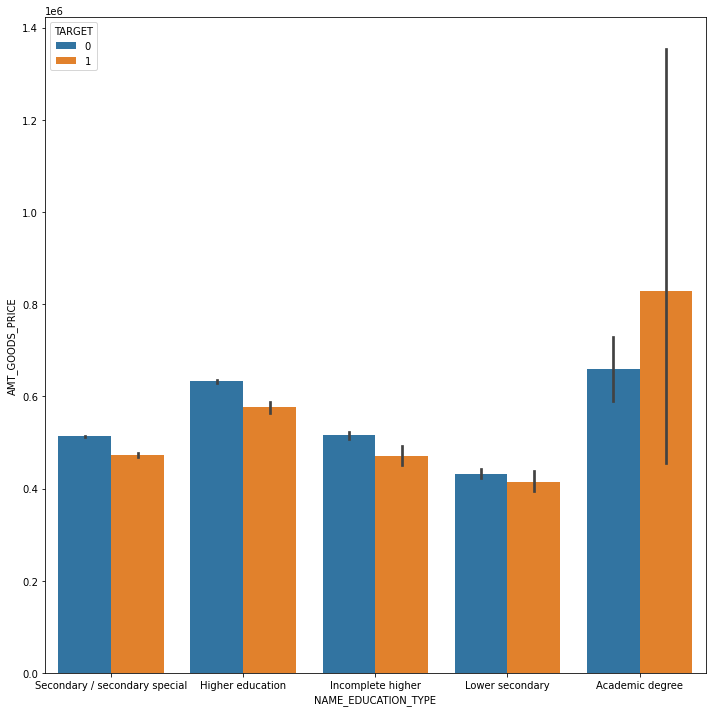

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(data = application_data, x='NAME_EDUCATION_TYPE',y='AMT_GOODS_PRICE',hue='TARGET')
plt.xticks(rotation=0)
plt.legend(title='TARGET')
plt.tight_layout()
plt.show()

##### Inference : 
1) Clients with a Acedemic Degrees with loans of High AMT_GOODS_PRICE tend to default higher than any other segment. 

#### 5.3 Multivariate Analysis

#### 5.3.1 Multivariate Analysis on INCOME_GROUP,AGE_GROUP,CODE_GENDER for Defaulters

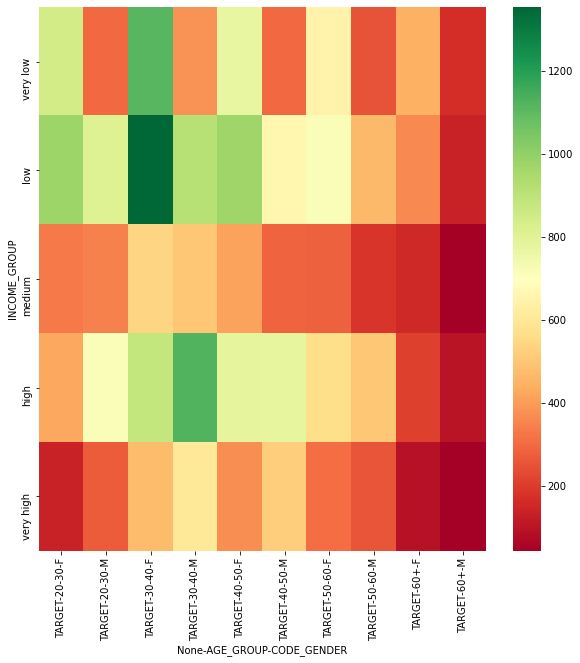

In [92]:
pivot_group99 = pd.pivot_table(data=application_data,index=['INCOME_GROUP'],columns=['AGE_GROUP','CODE_GENDER'],values=['TARGET'],aggfunc='sum',fill_value=0)

plt.figure(figsize=(10,10))
sns.heatmap(pivot_group99, cmap='RdYlGn')
plt.show()

##### Inference : 
1) Default rates are noticebale for clients under the low income group for ages 20-40 Males and 20-50 Females

2) The worst client is a low income group 30-40 Female.

#### 5.3.2 Multivariate Analysis on INCOME_GROUP,NAME_EDUCATION_TYPE  for Defaulters

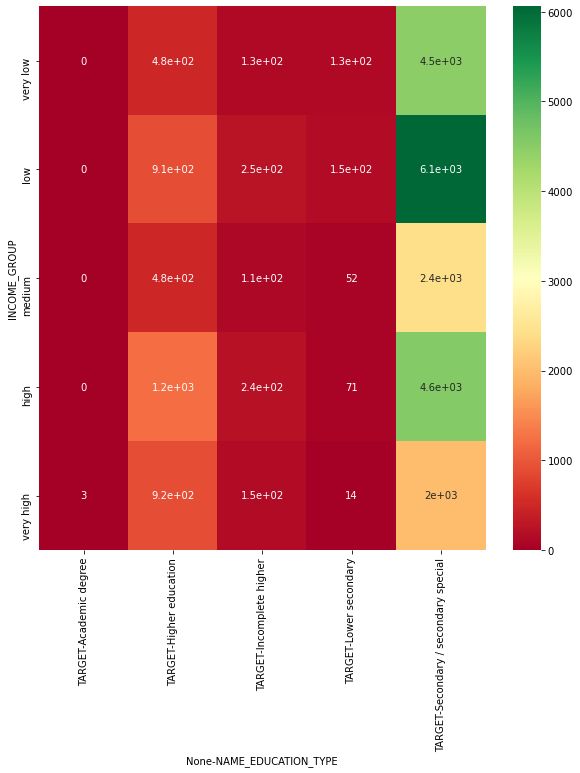

In [93]:

pivot_group99 = pd.pivot_table(data=application_data,index=['INCOME_GROUP'],columns=['NAME_EDUCATION_TYPE'],values=['TARGET'],aggfunc='sum',fill_value=0)

plt.figure(figsize=(10,10))
sns.heatmap(pivot_group99, cmap='RdYlGn', annot=True)
plt.show()

##### Inference : 
1) Clients who have Secondary/Secondary Special education show more defaults no matter their income group.


#### 5.3.3 Multivariate Analysis on INCOME_GROUP,REGION_RATING_CLIENT, CODE_GENDER  for Defaulters

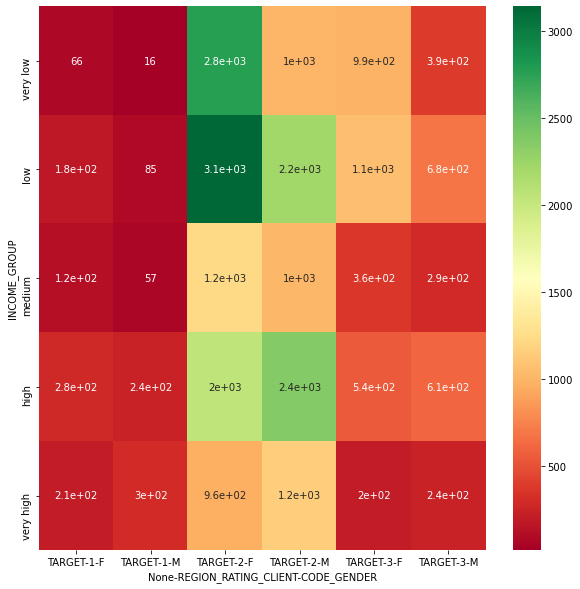

In [94]:
pivot_group99 = pd.pivot_table(data=application_data,index=['INCOME_GROUP'],columns=['REGION_RATING_CLIENT',"CODE_GENDER"],values=['TARGET'],aggfunc='sum',fill_value=0)

plt.figure(figsize=(10,10))
sns.heatmap(pivot_group99, cmap='RdYlGn', annot=True)
plt.show()

##### Inference : 
1) Female Clients with a region rating of 2 accross all income groups show higher default

2) Male Clients with a region rating of 2 follow closely.

#### 5.3 Merged Data Frame Analysis.


Let's merge the two Dataframes to find what inferences we can make.

In [95]:
merged_data = pd.merge(application_data,prev_application_data,how='inner',on='SK_ID_CURR')
merged_data.head()

,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE_x,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_x,FLAG_OWN_CAR,FLAG_EMAIL,TARGET,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,NAME_HOUSING_TYPE,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START_x,SK_ID_CURR,INCOME_GROUP,AGE,AGE_GROUP,EMP_EXP,EMP_EXP_GROUP,NAME_TYPE_SUITE_y,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,CNT_PAYMENT,PRODUCT_COMBINATION,AMT_CREDIT_y,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,AMT_APPLICATION,NAME_PAYMENT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,SK_ID_PREV
0,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No,Laborers,0.139376,0.0,1.0,0.0,0.0,0.0,0.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,406597.5,N,0,1,1,1,0,1,1,Cash loans,M,Y,202500.0,-2120,-3648.0,-637,-9461,0.018801,2,Single / not married,Secondary / secondary special,Working,0,House / apartment,0,2,WEDNESDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,10,100002,high,25.920548,20-30,1.745205,0-5,Unknown,-17.0,0.0,365243.0,-565.0,125.0,-25.0,179055.0,9251.775,24.0,POS other with interest,179055.0,Consumer loans,SATURDAY,9,Y,1,179055.0,XNA,XAP,Approved,-606,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,1038818
1,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,1293502.5,N,0,0,1,1,0,1,1,Cash loans,F,N,270000.0,-291,-1186.0,-1188,-16765,0.003541,1,Married,Higher education,State servant,0,House / apartment,0,1,MONDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,School,0,0,0,0,0,11,100003,very high,45.931507,40-50,3.254795,0-5,Unaccompanied,-527.0,1.0,365243.0,-716.0,-386.0,-536.0,900000.0,98356.995,12.0,Cash X-Sell: low,1035882.0,Cash loans,FRIDAY,12,Y,1,900000.0,XNA,XNA,Approved,-746,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,1810518
2,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,1293502.5,N,0,0,1,1,0,1,1,Cash loans,F,N,270000.0,-291,-1186.0,-1188,-16765,0.003541,1,Married,Higher education,State servant,0,House / apartment,0,1,MONDAY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,School,0,0,0,0,0,11,100003,very high,45.931507,40-50,3.254795,0-5,Family,-639.0,0.0,365243.0,-797.0,-647.0,-647.0,337500.0,64

In [96]:
merged_data.shape

(1413701, 118)

In [97]:
merged_data.describe()

,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_x,FLAG_EMAIL,TARGET,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,CNT_CHILDREN,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START_x,SK_ID_CURR,AGE,EMP_EXP,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,CNT_PAYMENT,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,AMT_APPLICATION,DAYS_DECISION,SELLERPLACE_AREA,SK_ID_PREV
count,715193.000000,715193.000000,715193.000000,729019.000000,729019.000000,729019.000000,736160.000000,1.171859e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.411880e+06,1.413701e+06,1.413608e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.094176e+06,1.413701e+06,1.106488e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,0.218556,0.221945,0.222317,0.977220,0.977235,0.976515,0.099922,4.896986e-01,3.615394e-01,2.912612e+00,3.856572e-02,3.013734e-01,6.817196e-03,6.202833e-03,1.544176e+00,1.526303e+00,1.080426e-01,1.540436e-01,5.114275e-01,5.276522e+05,2.701702e+04,2.150501e+00,-1.084701e+03,5.875537e+05,7.242904e-02,8.655296e-02,2.828752e-01,9.992452e-01,1.822585e-01,8.064393e-01,1.0,1.733160e+05,-3.034563e+03,-5.003233e+03,6.870203e+04,-1.632105e+04,2.074985e-02,2.059638e+00,4.048933e-01,1.207327e-02,2.037603e+00,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,1.740601e-01,2.221481e-01,7.360538e-02,3.604793e-02,4.396686e-02,1.198433e+01,2.784813e+05,4.471521e+01,1.990780e+02,82353.171672,0.330572,342257.656710,13488.741567,33274.831806,76665.634755,2.264512e+05,1.484032e+04,1.605194e+01,1.963541e+05,1.247893e+01,9.964321e-01,1.752436e+05,-8.803670e+02,3.149878e+02,1.922744e+06
std,0.140270,0.141436,0.140943,0.062588,0.061647,0.067386,0.103888,1.965360e-01,9.257137e-01,2.199798e+00,2.136566e-01,9.802897e-01,1.065273e-01,8.188486e-02,2.530715e+00,2.508953e+00,3.790588e-01

In [98]:
merged_Target0 = merged_data[merged_data.TARGET==0]
merged_Target1 = merged_data[merged_data.TARGET==1]

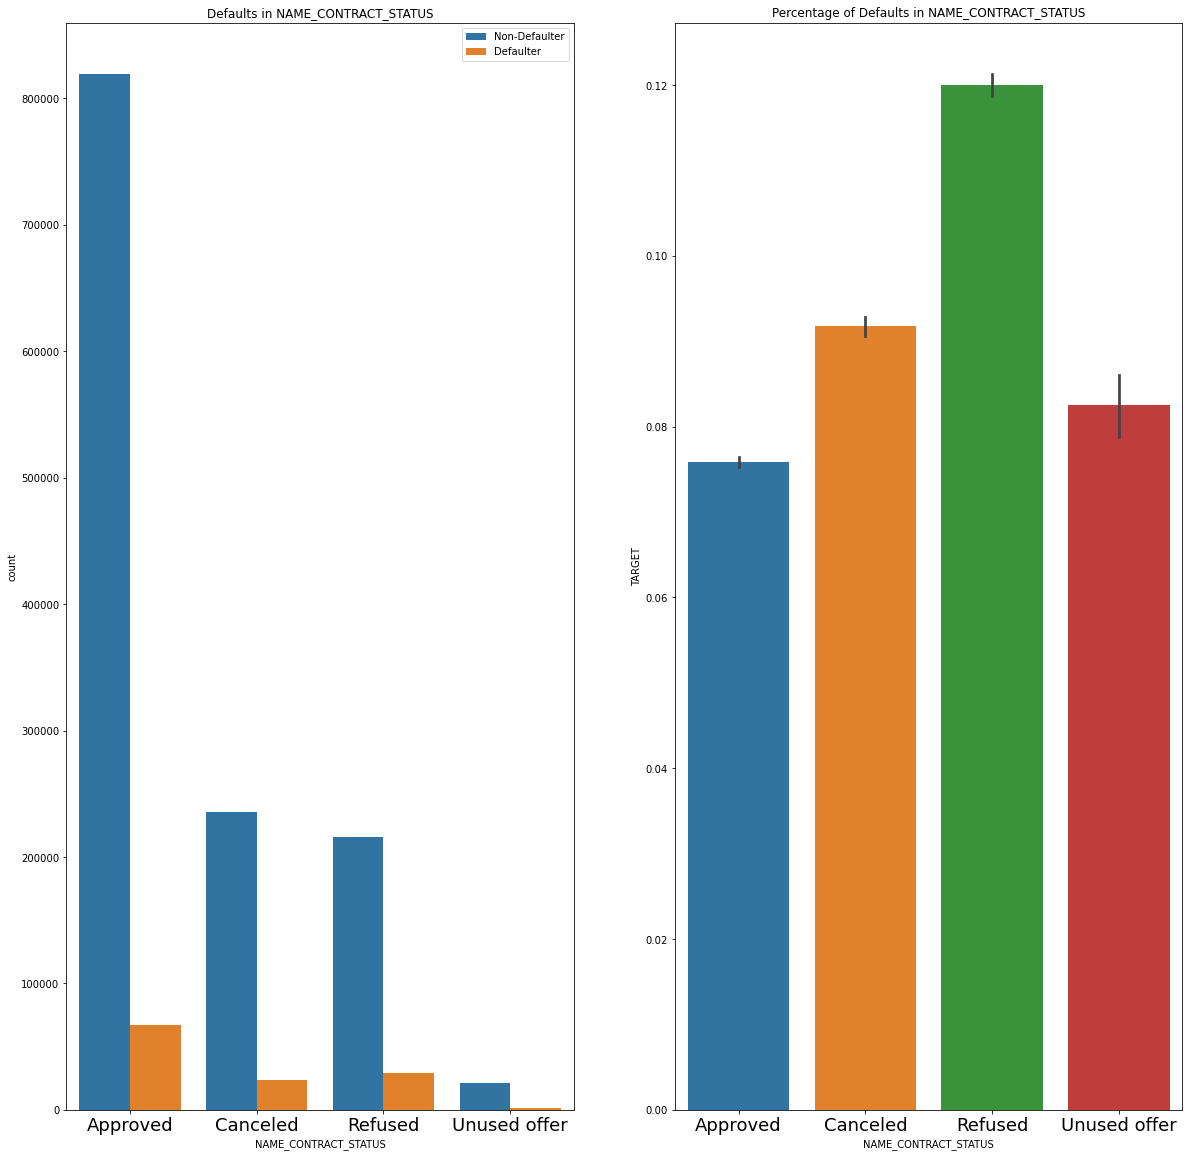

In [99]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='NAME_CONTRACT_STATUS', data=merged_data, hue="TARGET")
plt.legend(['Non-Defaulter','Defaulter'])
plt.title('Defaults in NAME_CONTRACT_STATUS')
plt.xticks(fontsize=18,rotation=0)
plt.subplot(122)
sns.barplot(x='NAME_CONTRACT_STATUS', data=merged_data, y='TARGET')
plt.title('Percentage of Defaults in NAME_CONTRACT_STATUS')
plt.xticks(fontsize=18,rotation=0)
plt.show()

##### Inference : 
1) We see that defautls are highers in clients with Unused Offer.


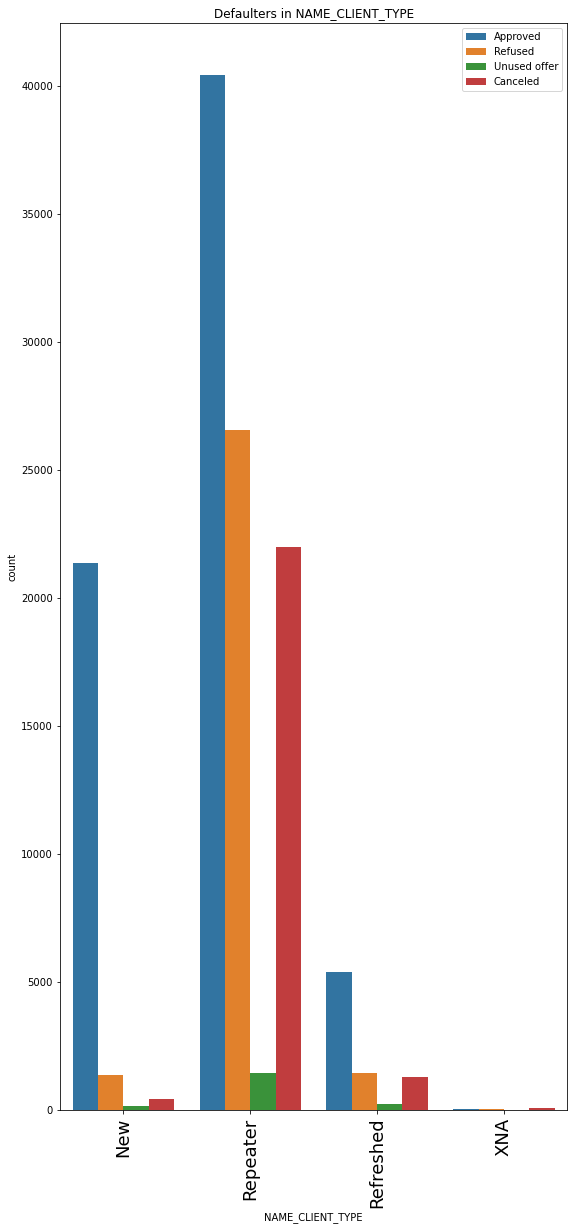

<Figure size 432x288 with 0 Axes>

In [100]:
plt.figure(figsize=(20,20))
plt.subplot(121)
sns.countplot(x='NAME_CLIENT_TYPE', data=merged_Target1, hue="NAME_CONTRACT_STATUS")
plt.legend()
plt.title('Defaulters in NAME_CLIENT_TYPE')
plt.xticks(fontsize=18,rotation=90)
plt.show()
plt.tight_layout()

##### Inference : 
1) We see that Repeater Clients are more likely to default compared to Newer clients. 


### 6 Conclusion

Driver Variables to Determine if a client will Default:

1) NAME_INCOME_TYPE: We see that if a client is Working they have high default rates

2) NAME_EDUCATION_TYPE: We also see how secondary and higher secondary have default rates 

3) AGE_GROUP : We saw earlier on how age ranges 20-40 tend to default more. 

4) NAME_FAMILY_STATUS : We saw that Married clients had a higher risk of default 

5) AMT_CREDIT: We saw that when analysed with other driver variables, how clients had a higher risk of default especially when compared to the Education and Occupation types. 

6) INCOME_GROUP : We saw that the various segements of clients under different age groups and Education show more defaults for a low income group.

7) AMT_GOODS_PRICE : We saw that the various segements of clients Income Types show more defaults for high GOOD_TOTAL values.

###### Since some of the driver_varibales choosen here are categorical in nature we can not find out the correlation directly. But notice that the dervied variables AGE_GROUP and INCOME_GROUP are derived from numerical values and hence we can calculate the correaltion between them. 

In [101]:
cols = ['AMT_INCOME_TOTAL','DAYS_BIRTH','AMT_CREDIT','AMT_GOODS_PRICE']
driver_vars_corr = application_data.loc[:,cols].corr()
driver_vars_corr

,AMT_INCOME_TOTAL,DAYS_BIRTH,AMT_CREDIT,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.027261,0.156870,0.159632
DAYS_BIRTH,0.027261,1.000000,-0.055436,-0.053510
AMT_CREDIT,0.156870,-0.055436,1.000000,0.986734
AMT_GOODS_PRICE,0.159632,-0.053510,0.986734,1.000000


<AxesSubplot:>

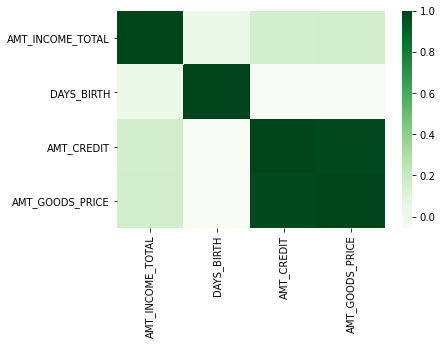

In [102]:
sns.heatmap(driver_vars_corr,cmap='Greens')

##### Inference :
We see that AMT_INCOME_TOTAL and AMT_CREDIT show a good positive correlation, simialrly shows a good positive correlation with  AMT_GOODS_PRICE

AMT_CREDIT and AMT_GOODS_PRICE show a great positive correlation.

However, DAYS_BIRTH and AMT_INCOME_TOTAL have a low positive correlation. 
